# Set Up

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [10]:
# reading clean and enriched dataframe from EDA notebook
df = pd.read_csv('Data/enriched_df.csv')

# Set Display options
pd.set_option('display.max_columns', None)

In [11]:
df

,circuit_number,circuit_name,outage_date,season,outage_cause_code,outage_cause,outage_duration,customers_affected,cmi,voltage,region,customer_count,circuit_miles,percent_overhead,percent_underground,saidi_2023,saidi_2024,saidi_diff_from_prev_year,saifi_2023,saifi_2024,saifi_diff_from_prev_year,total_outage_time_2024,total_outages_2024
0,1,Orange,2024-01-05,Winter,8,Other,837,376,314712,4,Coastal,1299,45,90,10,1.68,1.94,0.26,0.002,0.002,0.000,2521,3
1,1,Orange,2024-08-27,Summer,3,Weather,515,1299,668985,4,Coastal,1299,45,90,10,1.68,1.94,0.26,0.002,0.002,0.000,2521,3
2,1,Orange,2024-11-10,Fall,4,Third Party,1169,862,1007678,4,Coastal,1299,45,90,10,1.68,1.94,0.26,0.002,0.002,0.000,2521,3
3,2,Alabama,2024-03-13,Spring,1,UG Equipment Failure,227,1399,317573,12,North,3447,29,82,18,0.57,0.60,0.03,0.001,0.001,0.000,2073,4
4,2,Alabama,2024-03-15,Spring,1,UG Equipment Failure,19,3198,60762,12,North,3447,29,82,18,0.57,0.60,0.03,0.001,0.001,0.000,2073,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,21,Dinan,2024-04-14,Spring,7,OH Equipment Failure,758,2475,1876050,12,Coastal,2600,109,55,45,2.09,1.92,-0.17,0.001,0.003,0.002,4994,7
96,21,Dinan,2024-04-24,Spring,4,Third Party,727,1043,758261,12,Coastal,2600,109,55,45,2.09,1.92,-0.17,0.001,0.003,0.002,4994,7
97,21,Dinan,2024-05-28,Spring,1,UG Equipment Failure,31,2562,79422,12,Coastal,2600,109,55,45,2.09,1.92,-0.17,0.001,0.003,0.002,4994,7
98,21,Dinan,2024-07-29,Summer,4,Third Party,1221,644,786324,12,Coastal,2600,109,55,45,2.09,1.92,-0.17,0.001,0.003,0.002,4994,7


In [13]:
# Circuits Ordered by total Customer Minutes Interrupted

total_cmi = (
    df
    .groupby(['circuit_name', 'region', 'voltage'])['cmi']
    .sum()
    .reset_index(name='total_cmi')  
    .sort_values(by='total_cmi', ascending=False)
    .reset_index(drop=True)
)


total_cmi

,circuit_name,region,voltage,total_cmi
0,Magenta,Mountain,16,11931193
1,Logan,North,16,10733130
2,Green,Coastal,12,8412718
3,Dinan,Coastal,12,6052304
4,Alabama,North,12,5672058
5,Gorilla,Desert,16,5017832
6,Thunder,Mountain,16,4302974
7,Hoover,North,12,3807217
8,Yellow,North,4,3137676
9,Lincoln,Mountain,16,2631380


# Analysis Per Region 
* Most Common Outage Cause Per Region 
* CMI per region 
* Average Outage Count Per Cicuit 
* 

In [14]:
# most common outage causes per region 
outage_per_region = (
    df
    .groupby(["region", "outage_cause"])
    .size()
    .reset_index(name="outage_count")
    .sort_values(by=["region", "outage_count"], ascending=[True, False])
    .reset_index(drop=True)
)

outage_per_region 


,region,outage_cause,outage_count
0,Coastal,UG Equipment Failure,11
1,Coastal,Other,4
2,Coastal,Third Party,4
3,Coastal,Weather,3
4,Coastal,Animal,2
5,Coastal,Operation,2
6,Coastal,OH Equipment Failure,1
7,Coastal,Vegetation,1
8,Desert,OH Equipment Failure,5
9,Desert,Other,3


In [15]:
top_cause_per_region = (
    outage_per_region
    .sort_values(by=["region", "outage_count"], ascending=[True, False])
    .groupby("region")
    .head(1)
    .reset_index(drop=True)
)
top_cause_per_region

,region,outage_cause,outage_count
0,Coastal,UG Equipment Failure,11
1,Desert,OH Equipment Failure,5
2,Mountain,OH Equipment Failure,5
3,North,UG Equipment Failure,7


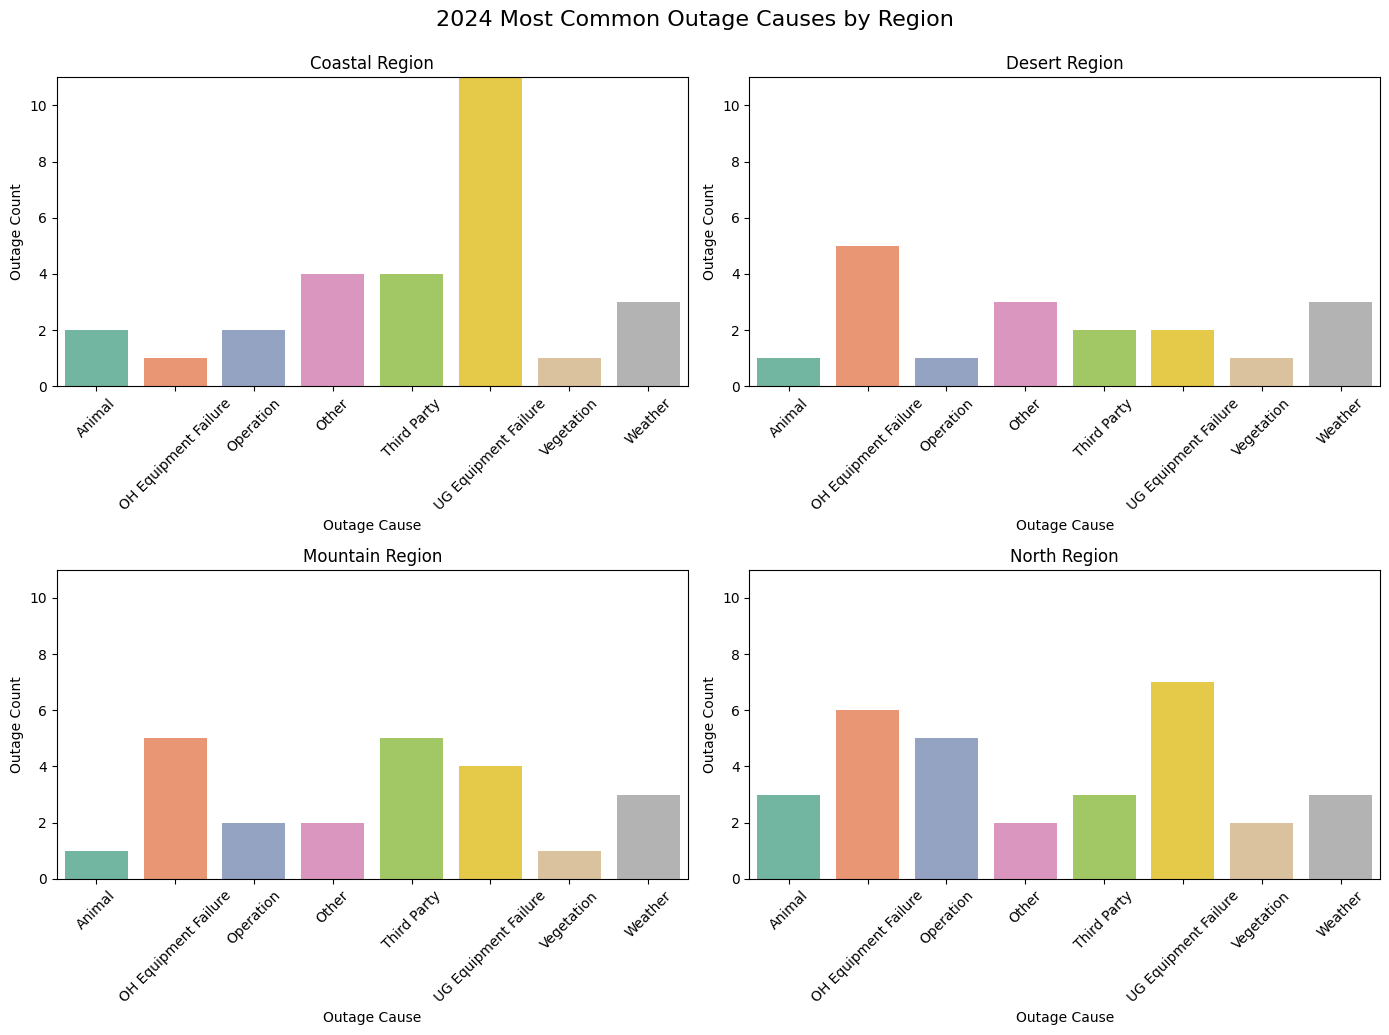

In [16]:
# histograms for most common outages per region

max_count = outage_per_region['outage_count'].max()

coastal = outage_per_region[outage_per_region["region"] == "Coastal"]
desert = outage_per_region[outage_per_region["region"] == "Desert"]
mountain = outage_per_region[outage_per_region["region"] == "Mountain"]
north = outage_per_region[outage_per_region["region"] == "North"]

all_causes = sorted(outage_cause['outage_cause'])
def fill_missing_causes(df):
    return (
        df.set_index('outage_cause')
        .reindex(all_causes, fill_value=0)
        .reset_index()
    )
coastal = fill_missing_causes(coastal)
desert = fill_missing_causes(desert)
mountain = fill_missing_causes(mountain)
north = fill_missing_causes(north)



palette = sns.color_palette("Set2")

fig, axs = plt.subplots(2, 2, figsize=(14, 10))



sns.barplot(data=coastal, x="outage_cause", y="outage_count",hue="outage_cause", ax=axs[0, 0], palette=palette)
axs[0, 0].set_title("Coastal Region")
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].set_ylim(0, max_count)
axs[0][0].set_xlabel("Outage Cause")
axs[0][0].set_ylabel("Outage Count")

sns.barplot(data=desert, x="outage_cause", y="outage_count",hue="outage_cause", ax=axs[0, 1], palette=palette)
axs[0, 1].set_title("Desert Region")
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].set_ylim(0, max_count)
axs[0][1].set_xlabel("Outage Cause")
axs[0][1].set_ylabel("Outage Count")

sns.barplot(data=mountain, x="outage_cause", y="outage_count",hue="outage_cause", ax=axs[1, 0], palette=palette)
axs[1, 0].set_title("Mountain Region")
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].set_ylim(0, max_count)
axs[1][0].set_xlabel("Outage Cause")
axs[1][0].set_ylabel("Outage Count")

sns.barplot(data=north, x="outage_cause", y="outage_count",hue="outage_cause", ax=axs[1, 1], palette=palette)
axs[1, 1].set_title("North Region")
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].set_ylim(0, max_count)
axs[1][1].set_xlabel("Outage Cause")
axs[1][1].set_ylabel("Outage Count")

plt.tight_layout()
plt.suptitle("2024 Most Common Outage Causes by Region", fontsize=16, y=1.03)  
plt.show()


In [17]:
# Circuit Type Count Per region 
circuit_per_region = (
    df
    .groupby(['region', 'circuit_name', 'voltage','customer_count', 'circuit_miles', 'percent_overhead', 'percent_underground'])
    .size()
    .reset_index(name = 'outage_count')
    .sort_values(by = ['region', 'outage_count'], ascending = False)
    .reset_index(drop=True)
)

circuit_per_region

,region,circuit_name,voltage,customer_count,circuit_miles,percent_overhead,percent_underground,outage_count
0,North,Logan,16,3220,45,60,40,10
1,North,Hoover,12,2610,112,66,34,7
2,North,Yellow,4,1706,43,85,15,7
3,North,Alabama,12,3447,29,82,18,4
4,North,Washington,12,1312,38,18,82,3
5,Mountain,Magenta,16,2367,129,75,25,10
6,Mountain,Lincoln,16,1634,95,65,35,6
7,Mountain,Johnson,16,1641,64,60,40,3
8,Mountain,Thunder,16,3945,72,85,15,2
9,Mountain,Grand,4,500,11,90,10,1


In [18]:
# Total Customer Minutes Interrupted Per Region

total_cmi_per_region = (
    total_cmi
    .groupby('region')['total_cmi']
    .sum()
    .reset_index(name='total_cmi')
    .sort_values(by = 'total_cmi', ascending=False)
    .reset_index(drop=True)
    
)

total_cmi_per_region

,region,total_cmi
0,North,25597270
1,Coastal,21451249
2,Mountain,21224894
3,Desert,7696578


In [19]:
outages_per_region_2024 = (
    df
    .groupby('region')
    .size()
    .reset_index(name='outage_count_2024')
    .sort_values(by='outage_count_2024', ascending=False)
    .reset_index(drop=True)
)

circuits_per_region = (
    df[['region', 'circuit_name']]
    .drop_duplicates()
    .groupby('region')
    .size()
    .reset_index(name='circuit_count')
)

# Merge to include per-circuit average
outages_per_region_2024 = outages_per_region_2024.merge(
    circuits_per_region, on='region', how='left'
)

outages_per_region_2024['outages_per_circuit'] = (
    outages_per_region_2024['outage_count_2024'] / outages_per_region_2024['circuit_count']
)

outages_per_region_2024

,region,outage_count_2024,circuit_count,outages_per_circuit
0,North,31,5,6.200000
1,Coastal,28,5,5.600000
2,Mountain,23,6,3.833333
3,Desert,18,5,3.600000


/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/1446971635.py:5: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/1446971635.py:19: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(


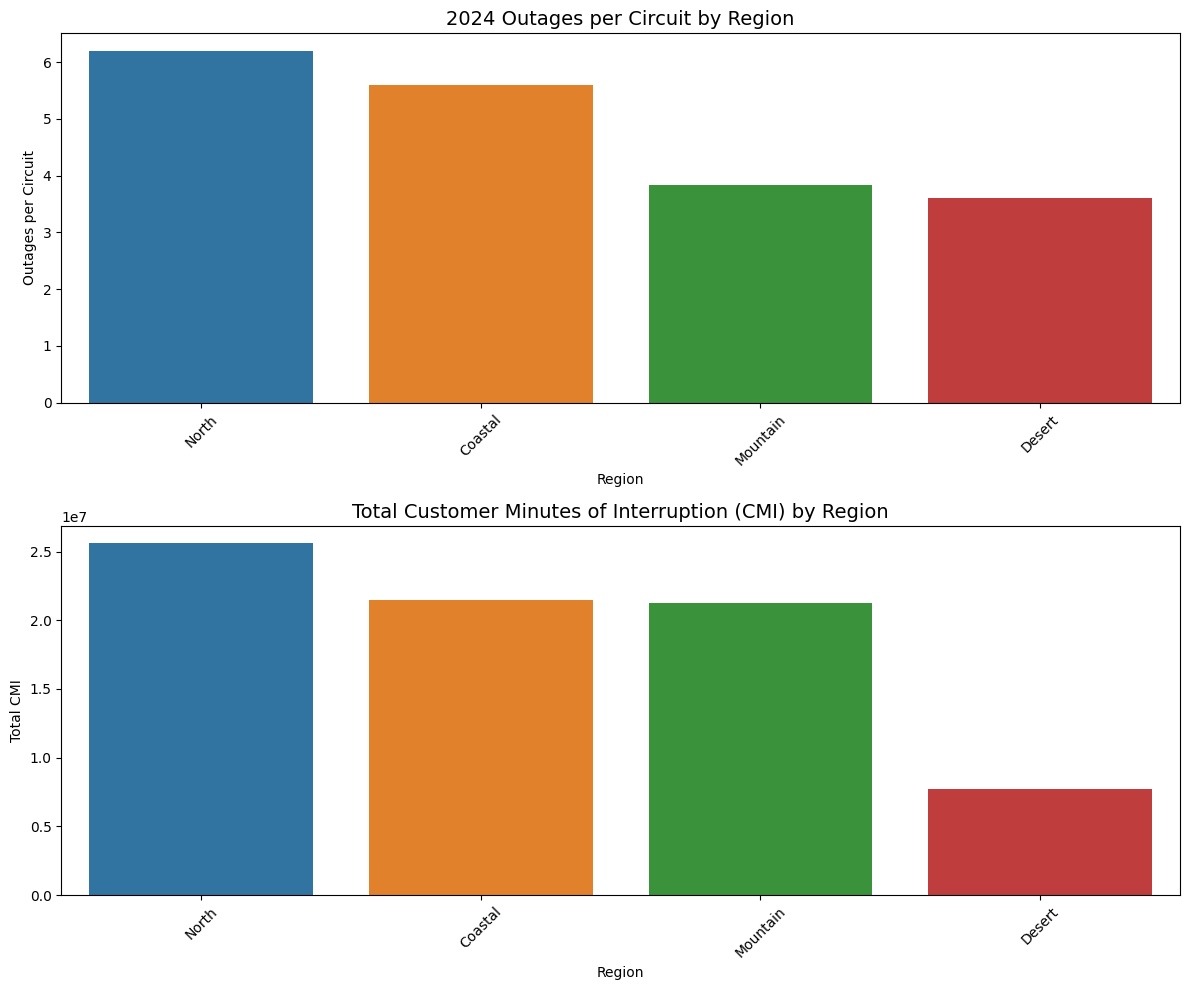

In [20]:

palette = sns.color_palette(palette = 'tab10')
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Circuit outages per Region
sns.barplot(
    data=outages_per_region_2024,
    x='region',
    y='outages_per_circuit',
    hue='region',
    ax = axs[0],
    palette=palette  
)
axs[0].set_title('2024 Outages per Circuit by Region', fontsize=14)
axs[0].set_xlabel('Region')
axs[0].set_ylabel('Outages per Circuit')
axs[0].tick_params(axis = 'x', rotation = 45)

# Total Cmi Per Region
sns.barplot(
    data = total_cmi_per_region,
    x = 'region',
    y = 'total_cmi',
    hue = 'region',
    ax=axs[1],
    palette = palette
)

axs[1].set_title('Total Customer Minutes of Interruption (CMI) by Region', fontsize=14)
axs[1].set_xlabel('Region')
axs[1].set_ylabel('Total CMI')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Analysis per Outage Cause 
* Cause of Most Outages 
* Average, Median, and Total Duration Per Outage by Outage Cause 
* Average, Median, and Total CMI Per Outage by Outage Cause 

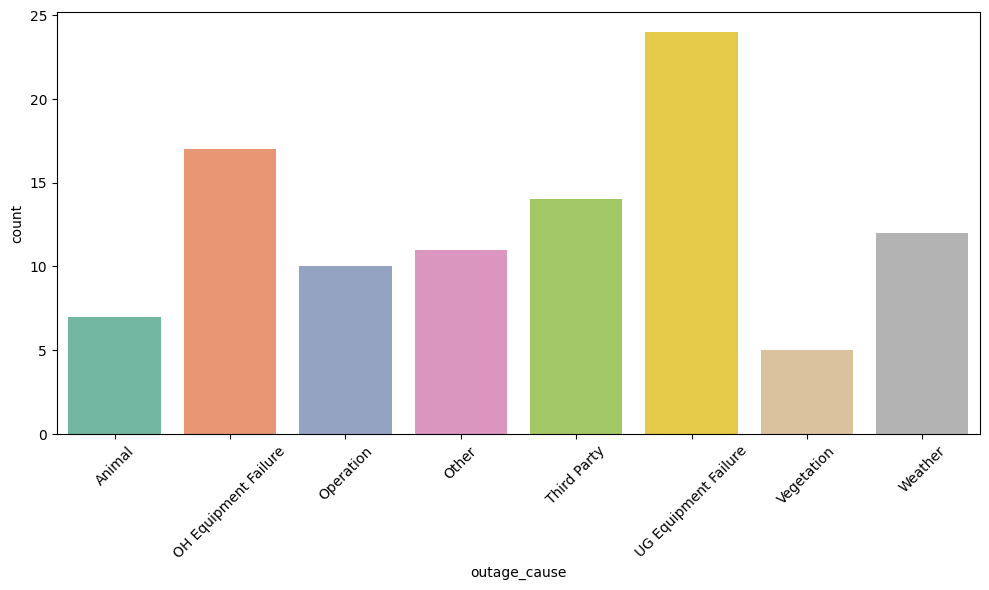

In [21]:
# top outage causes 

top_outage_causes_2024 = (
    df
    .groupby("outage_cause")
    .size()
    .reset_index(name="count")
    .sort_values(by='outage_cause', ascending = True)
    .reset_index(drop=True)
)

# top_outage_causes_2024

plt.figure(figsize=(10,6))

sns.barplot(top_outage_causes_2024, x = 'outage_cause', y = 'count', hue = 'outage_cause', palette = 'Set2', legend=False)
plt.tick_params(rotation = 45, axis = 'x')
plt.tight_layout()

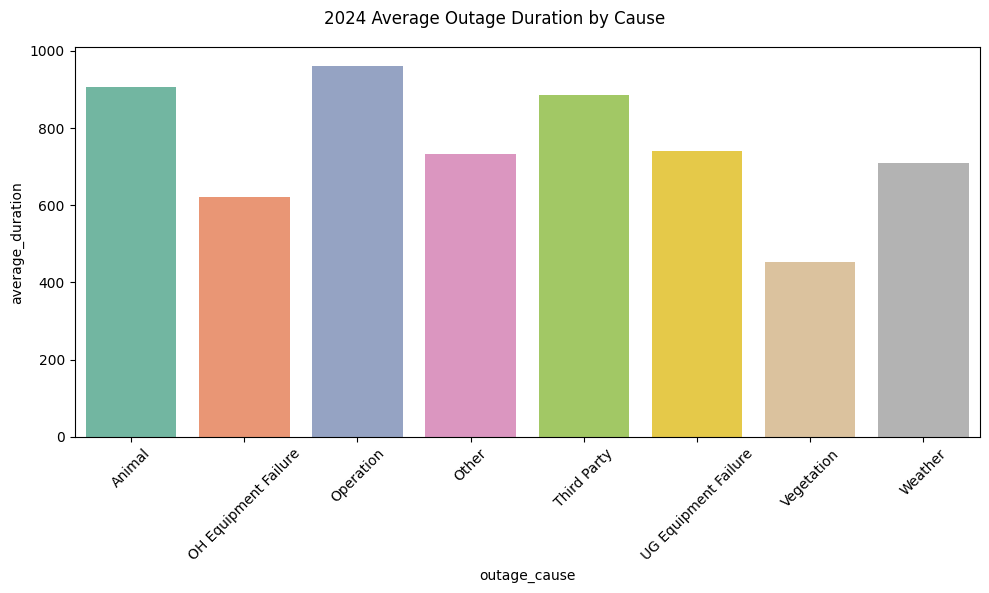

In [22]:
#  Outage Cause Average Duration Per Outage - 2024
outage_cause_avg_duration = (
    df
    .groupby('outage_cause')['outage_duration']
    .mean()
    .reset_index(name='average_duration')
    .sort_values(by='outage_cause', ascending = True)
    .reset_index(drop=True)
)
plt.figure(figsize = (10,6))
sns.barplot(
    data = outage_cause_avg_duration,
    x = 'outage_cause',
    y='average_duration',
    hue = 'outage_cause',
    palette = 'Set2'
)
plt.tick_params(axis = 'x', rotation = 45)
plt.suptitle('2024 Average Outage Duration by Cause')
plt.tight_layout()

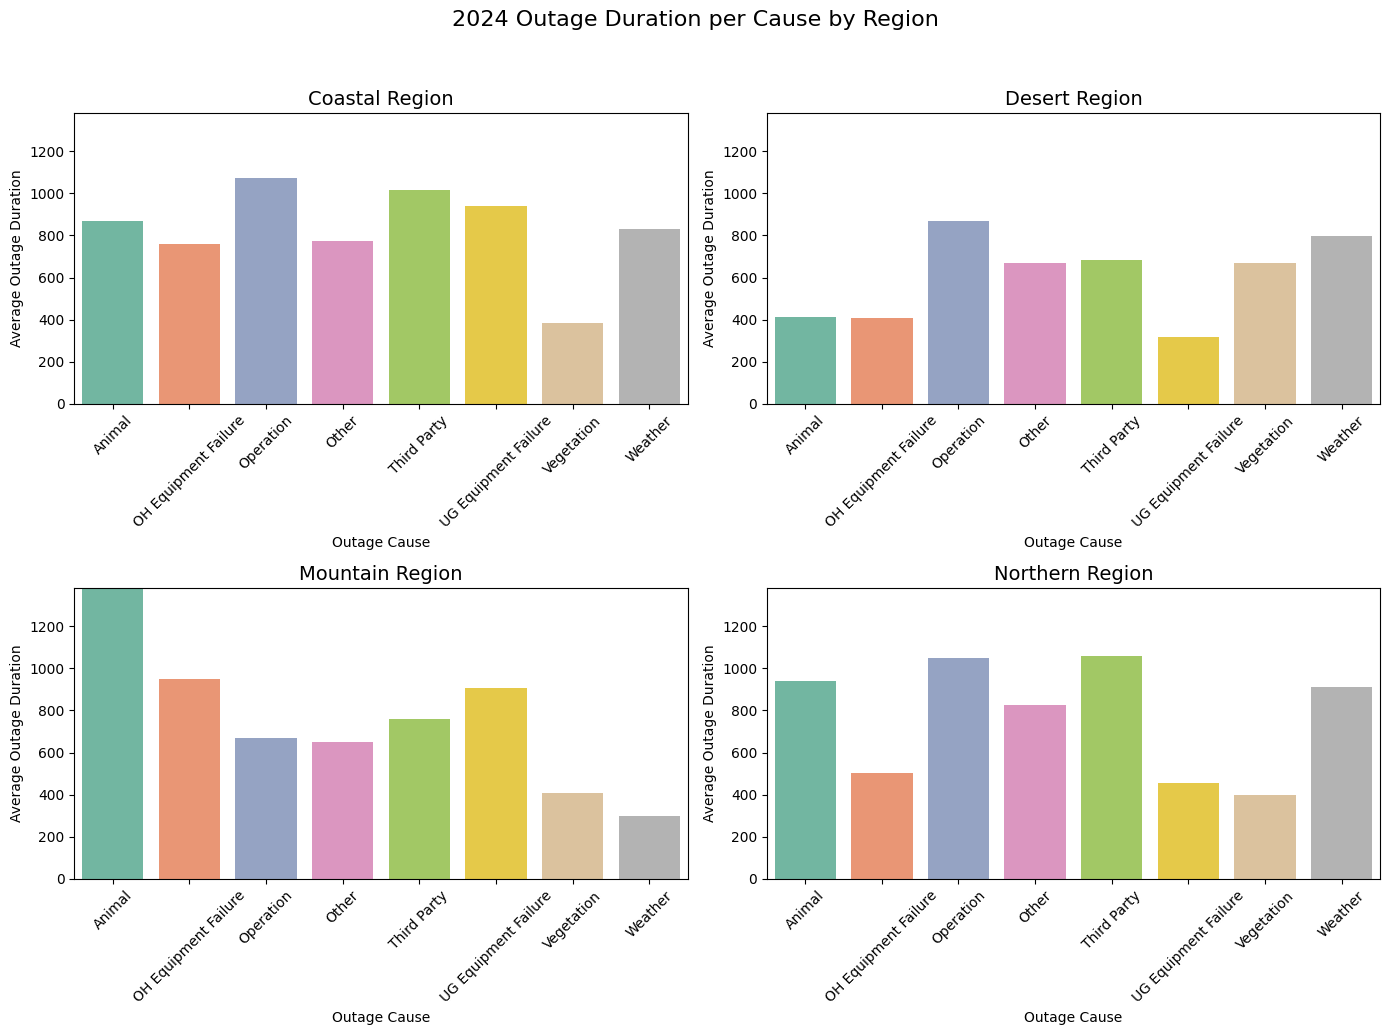

In [23]:
# Average Duration of Outage per outage cause per region 
outage_cause_duration_by_region = (
    df
    .groupby(['region','outage_cause'])['outage_duration']
    .mean()
    .reset_index(name='average_duration')
    .sort_values(by=['region','average_duration'], ascending = False)
    .reset_index(drop=True)
)
outage_cause_duration_by_region

palette = sns.color_palette("Set2")

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

coastal = outage_cause_duration_by_region[outage_cause_duration_by_region["region"] == "Coastal"]
desert = outage_cause_duration_by_region[outage_cause_duration_by_region["region"] == "Desert"]
mountain = outage_cause_duration_by_region[outage_cause_duration_by_region["region"] == "Mountain"]
north = outage_cause_duration_by_region[outage_cause_duration_by_region["region"] == "North"]

max_count = outage_cause_duration_by_region['average_duration'].max()
all_causes = sorted(outage_cause['outage_cause'])
def fill_missing_causes(df):
    return (
        df.set_index('outage_cause')
        .reindex(all_causes, fill_value=0)
        .reset_index()
    )
coastal = fill_missing_causes(coastal)
desert = fill_missing_causes(desert)
mountain = fill_missing_causes(mountain)
north = fill_missing_causes(north)

sns.barplot(
    coastal,
    x = 'outage_cause',
    y = 'average_duration',
    hue = 'outage_cause',
    palette = palette,
    ax=axs[0,0]
)
axs[0][0].set_title('Coastal Region', fontsize=14)
axs[0][0].tick_params(rotation = 45, axis = 'x')
axs[0][0].set_ylim(0,max_count)
axs[0][0].set_xlabel("Outage Cause")
axs[0][0].set_ylabel("Average Outage Duration")

sns.barplot(
    desert,
    x = 'outage_cause',
    y = 'average_duration',
    hue = 'outage_cause',
    palette = palette,
    ax=axs[0,1]
)
axs[0][1].set_title('Desert Region', fontsize=14)
axs[0][1].tick_params(rotation = 45, axis = 'x')
axs[0][1].set_ylim(0,max_count)
axs[0][1].set_xlabel("Outage Cause")
axs[0][1].set_ylabel("Average Outage Duration")

sns.barplot(
    mountain,
    x = 'outage_cause',
    y = 'average_duration',
    hue = 'outage_cause',
    palette = palette,
    ax=axs[1,0]
)
axs[1][0].set_title('Mountain Region', fontsize=14)
axs[1][0].tick_params(rotation = 45, axis = 'x')
axs[1][0].set_ylim(0,max_count)
axs[1][0].set_xlabel("Outage Cause")
axs[1][0].set_ylabel("Average Outage Duration")

sns.barplot(
    north,
    x = 'outage_cause',
    y = 'average_duration',
    hue = 'outage_cause',
    palette = palette,
    ax=axs[1,1]
)
axs[1][1].set_title('Northern Region', fontsize=14)
axs[1][1].tick_params(rotation = 45, axis = 'x')
axs[1][1].set_ylim(0,max_count)
axs[1][1].set_xlabel("Outage Cause")
axs[1][1].set_ylabel("Average Outage Duration")

plt.suptitle("2024 Outage Duration per Cause by Region", fontsize=16, y=1.03) 
plt.tight_layout()

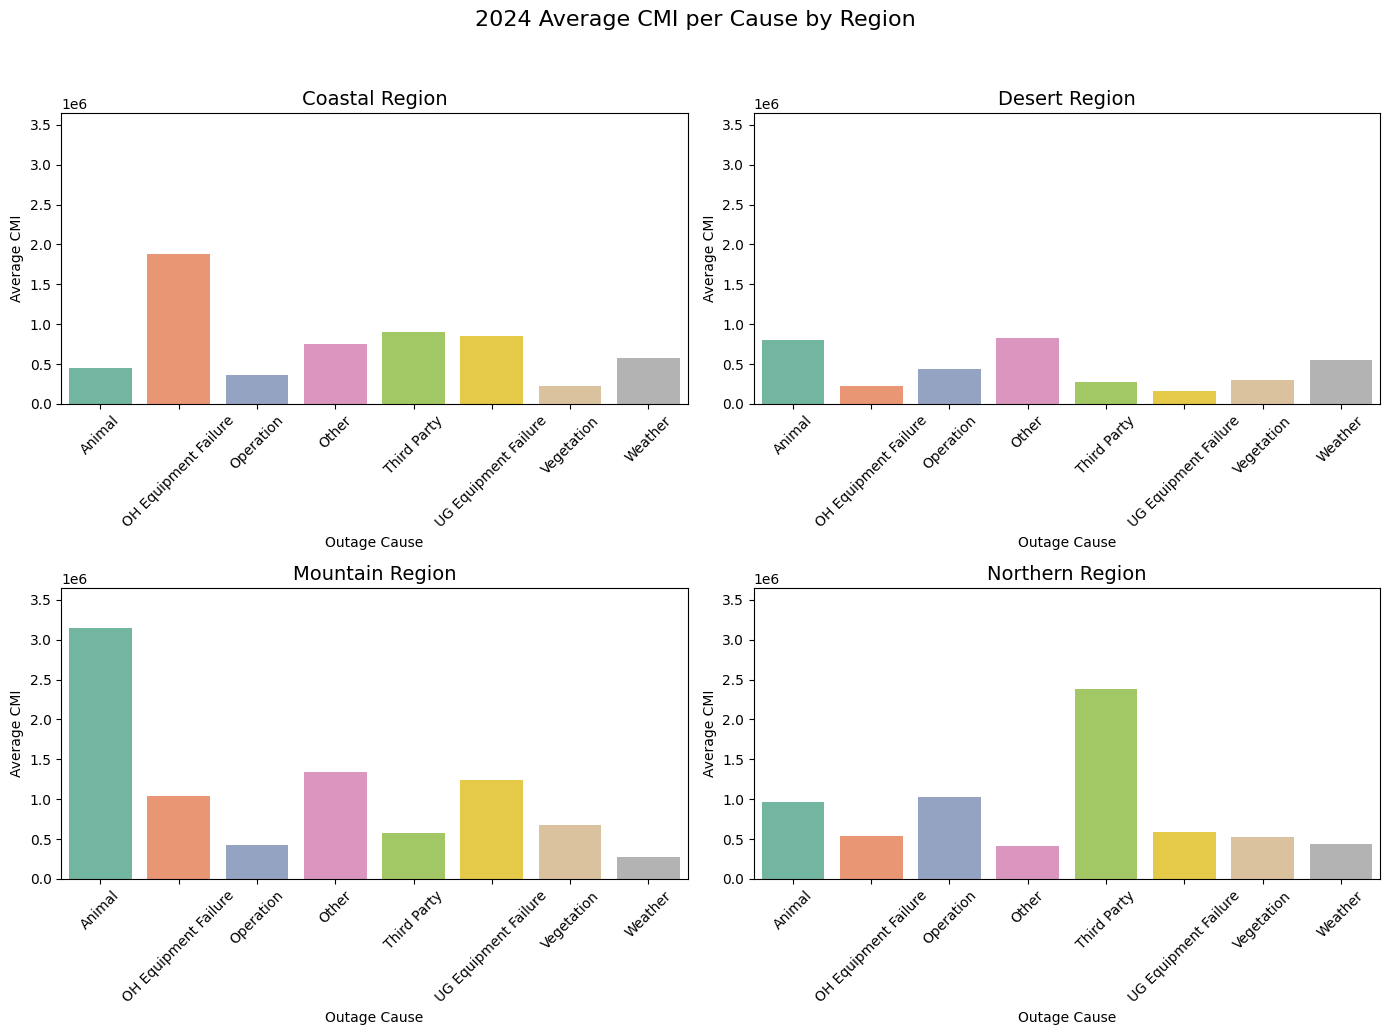

In [24]:

cmi_by_region = (
    df
    .groupby(['region', 'outage_cause'])['cmi']
    .mean()
    .reset_index(name='average')
    .sort_values(by=['region', 'average'], ascending=False)
    .reset_index(drop=True)
)
palette='Set2'

coastal = cmi_by_region[cmi_by_region["region"] == "Coastal"]
desert = cmi_by_region[cmi_by_region["region"] == "Desert"]
mountain = cmi_by_region[cmi_by_region["region"] == "Mountain"]
north = cmi_by_region[cmi_by_region["region"] == "North"]

max_cmi = cmi_by_region['average'].max() + 500000
# max_cmi = 10000000
all_causes = sorted(df['outage_cause'].unique())

def fill_missing_causes(df):
    return (
        df.set_index('outage_cause')
        .reindex(all_causes, fill_value=0)
        .reset_index()
    )

coastal = fill_missing_causes(coastal)
desert = fill_missing_causes(desert)
mountain = fill_missing_causes(mountain)
north = fill_missing_causes(north)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(
    data=coastal,
    x='outage_cause',
    y='average',
    hue='outage_cause',
    palette=palette,
    ax=axs[0, 0]
)
axs[0][0].set_title('Coastal Region', fontsize=14)
axs[0][0].tick_params(rotation=45, axis='x')
axs[0][0].set_ylim(0, max_cmi)
axs[0][0].set_xlabel("Outage Cause")
axs[0][0].set_ylabel("Average CMI")

sns.barplot(
    data=desert,
    x='outage_cause',
    y='average',
    hue='outage_cause',
    palette=palette,
    ax=axs[0, 1]
)
axs[0][1].set_title('Desert Region', fontsize=14)
axs[0][1].tick_params(rotation=45, axis='x')
axs[0][1].set_ylim(0, max_cmi)
axs[0][1].set_xlabel("Outage Cause")
axs[0][1].set_ylabel("Average CMI")

sns.barplot(
    data=mountain,
    x='outage_cause',
    y='average',
    hue='outage_cause',
    palette=palette,
    ax=axs[1, 0]
)
axs[1][0].set_title('Mountain Region', fontsize=14)
axs[1][0].tick_params(rotation=45, axis='x')
axs[1][0].set_ylim(0, max_cmi)
axs[1][0].set_xlabel("Outage Cause")
axs[1][0].set_ylabel("Average CMI")

sns.barplot(
    data=north,
    x='outage_cause',
    y='average',
    hue='outage_cause',
    palette=palette,
    ax=axs[1, 1]
)
axs[1][1].set_title('Northern Region', fontsize=14)
axs[1][1].tick_params(rotation=45, axis='x')
axs[1][1].set_ylim(0, max_cmi)
axs[1][1].set_xlabel("Outage Cause")
axs[1][1].set_ylabel("Average CMI")

plt.suptitle("2024 Average CMI per Cause by Region", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()


/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/2727072815.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coastal, x='circuit_name', y='saidi_2024', palette='crest', ax=axs[0][0])
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/2727072815.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=desert, x='circuit_name', y='saidi_2024', palette='rocket', ax=axs[0][1])
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/2727072815.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=

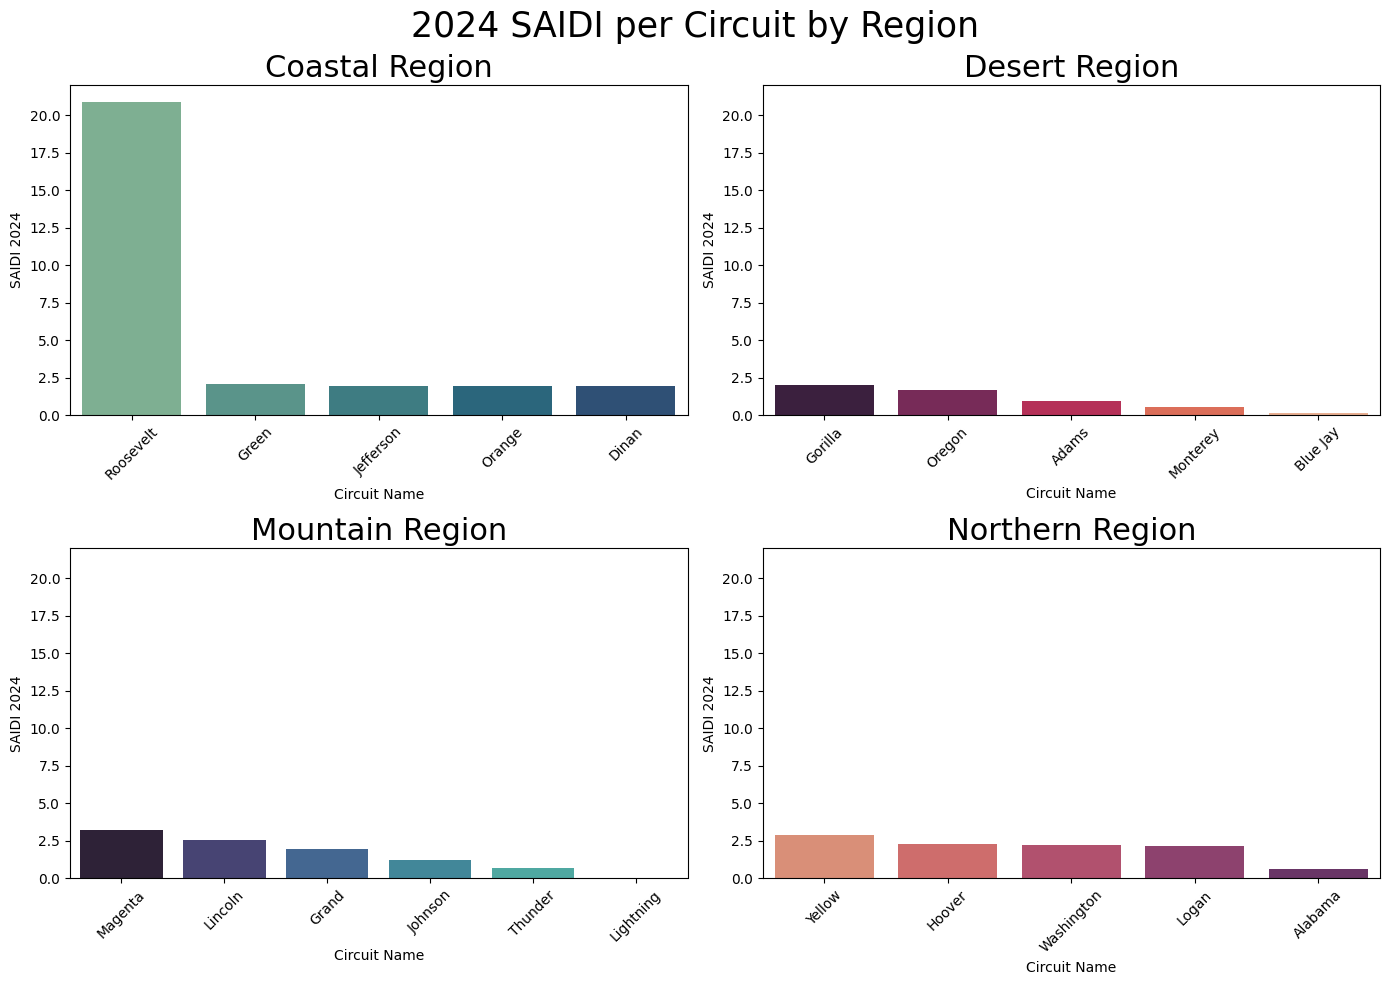

In [101]:
circuit_copy = circuit.copy().sort_values(by='circuit_name')

# Split into regions
coastal = circuit_copy[circuit_copy['region'] == 'Coastal'].sort_values(by='saidi_2024', ascending=False)
desert = circuit_copy[circuit_copy['region'] == 'Desert'].sort_values(by='saidi_2024', ascending=False)
mountain = circuit_copy[circuit_copy['region'] == 'Mountain'].sort_values(by='saidi_2024', ascending=False)
north = circuit_copy[circuit_copy['region'] == 'North'].sort_values(by='saidi_2024', ascending=False)

# Plot setup
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Coastal - Crest
sns.barplot(data=coastal, x='circuit_name', y='saidi_2024', palette='crest', ax=axs[0][0])
axs[0][0].set_title('Coastal Region', fontsize=22)
axs[0][0].tick_params(rotation=45, axis='x')
axs[0][0].set_ylim(0, 22)
axs[0][0].set_xlabel("Circuit Name")
axs[0][0].set_ylabel("SAIDI 2024")

# Desert - Rocket
sns.barplot(data=desert, x='circuit_name', y='saidi_2024', palette='rocket', ax=axs[0][1])
axs[0][1].set_title('Desert Region', fontsize=22)
axs[0][1].tick_params(rotation=45, axis='x')
axs[0][1].set_ylim(0, 22)
axs[0][1].set_xlabel("Circuit Name")
axs[0][1].set_ylabel("SAIDI 2024")

# Mountain - Mako
sns.barplot(data=mountain, x='circuit_name', y='saidi_2024', palette='mako', ax=axs[1][0])
axs[1][0].set_title('Mountain Region', fontsize=22)
axs[1][0].tick_params(rotation=45, axis='x')
axs[1][0].set_ylim(0, 22)
axs[1][0].set_xlabel("Circuit Name")
axs[1][0].set_ylabel("SAIDI 2024")

# Northern - Flare
sns.barplot(data=north, x='circuit_name', y='saidi_2024', palette='flare', ax=axs[1][1])
axs[1][1].set_title('Northern Region', fontsize=22)
axs[1][1].tick_params(rotation=45, axis='x')
axs[1][1].set_ylim(0, 22)
axs[1][1].set_xlabel("Circuit Name")
axs[1][1].set_ylabel("SAIDI 2024")

# Final layout
plt.suptitle('2024 SAIDI per Circuit by Region', fontsize=25)
plt.tight_layout()
plt.show()

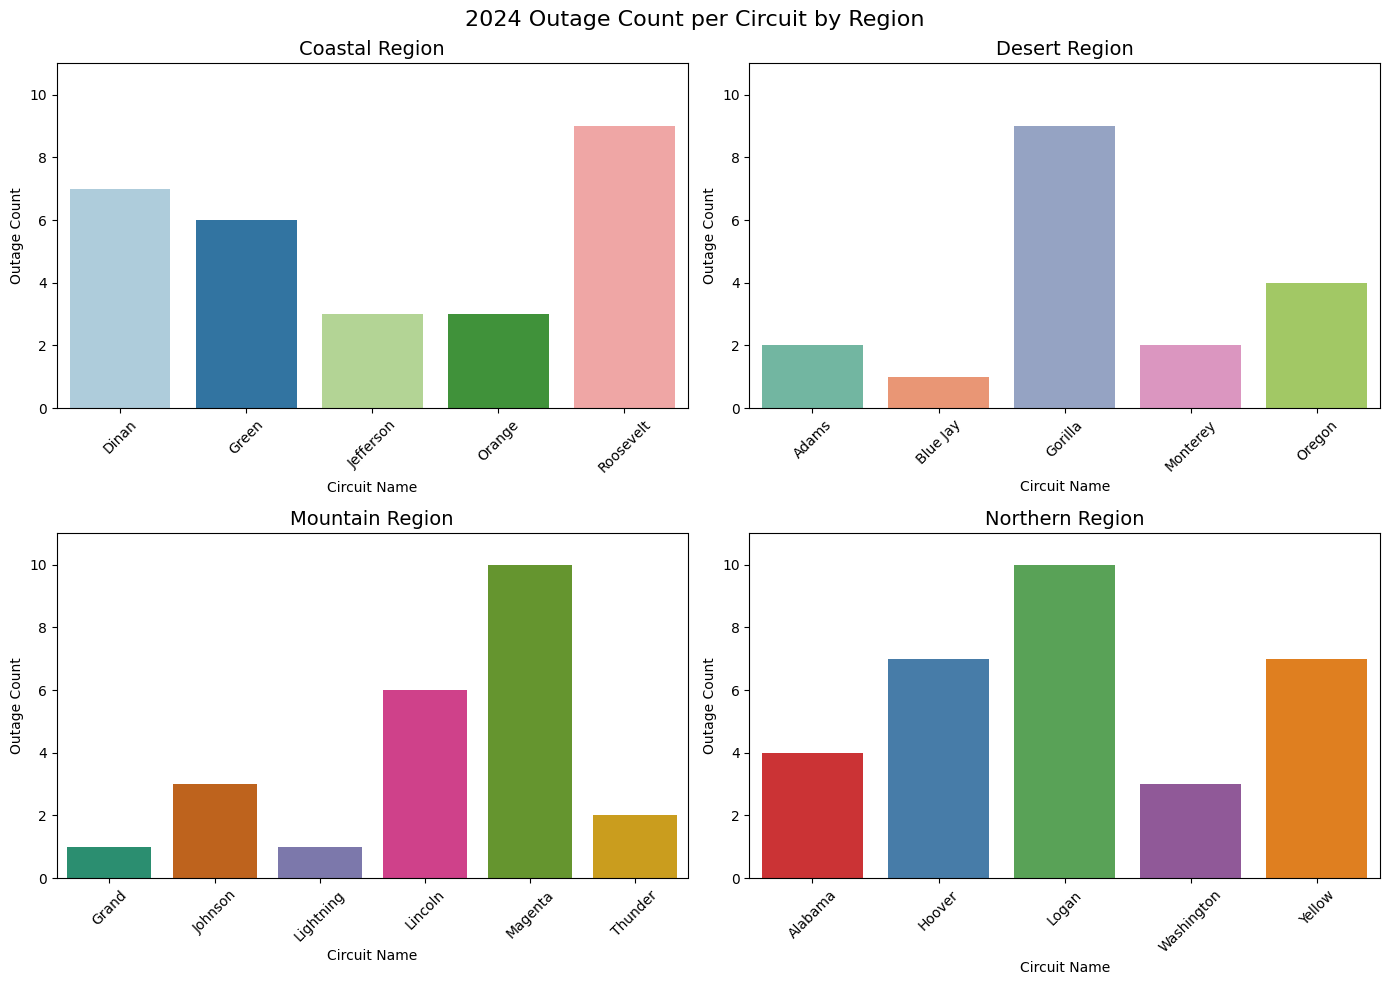

In [26]:
# Count outages per circuit
circuit_outage_counts = (
    df.groupby('circuit_name')
    .size()
    .reset_index(name='outage_count')
)

# Merge with circuit metadata (so we retain region info)
circuit_copy = circuit.copy().sort_values(by='circuit_name')
circuit_copy = circuit_copy.merge(circuit_outage_counts, on='circuit_name', how='left')

# Fill NA with 0 in case a circuit had no outages in df (unlikely, but safe)
circuit_copy['outage_count'] = circuit_copy['outage_count'].fillna(0)

# Split by region
coastal = circuit_copy[circuit_copy['region'] == 'Coastal']
desert = circuit_copy[circuit_copy['region'] == 'Desert']
mountain = circuit_copy[circuit_copy['region'] == 'Mountain']
north = circuit_copy[circuit_copy['region'] == 'North']

# Plot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(coastal, x='circuit_name', y='outage_count', hue='circuit_name', palette='Paired', ax=axs[0][0], legend=False)
axs[0][0].set_title('Coastal Region', fontsize=14)
axs[0][0].tick_params(rotation=45, axis='x')
axs[0][0].set_ylim(0, df['circuit_name'].value_counts().max() + 1)
axs[0][0].set_xlabel("Circuit Name")
axs[0][0].set_ylabel("Outage Count")

sns.barplot(desert, x='circuit_name', y='outage_count', hue='circuit_name', palette='Set2', ax=axs[0][1], legend=False)
axs[0][1].set_title('Desert Region', fontsize=14)
axs[0][1].tick_params(rotation=45, axis='x')
axs[0][1].set_ylim(0, df['circuit_name'].value_counts().max() + 1)
axs[0][1].set_xlabel("Circuit Name")
axs[0][1].set_ylabel("Outage Count")

sns.barplot(mountain, x='circuit_name', y='outage_count', hue='circuit_name', palette='Dark2', ax=axs[1][0], legend=False)
axs[1][0].set_title('Mountain Region', fontsize=14)
axs[1][0].tick_params(rotation=45, axis='x')
axs[1][0].set_ylim(0, df['circuit_name'].value_counts().max() + 1)
axs[1][0].set_xlabel("Circuit Name")
axs[1][0].set_ylabel("Outage Count")

sns.barplot(north, x='circuit_name', y='outage_count', hue='circuit_name', palette='Set1', ax=axs[1][1], legend=False)
axs[1][1].set_title('Northern Region', fontsize=14)
axs[1][1].tick_params(rotation=45, axis='x')
axs[1][1].set_ylim(0, df['circuit_name'].value_counts().max() + 1)
axs[1][1].set_xlabel("Circuit Name")
axs[1][1].set_ylabel("Outage Count")

plt.suptitle('2024 Outage Count per Circuit by Region', fontsize=16)
plt.tight_layout()
plt.show()


/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/376126427.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/376126427.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/376126427.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/376126427.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

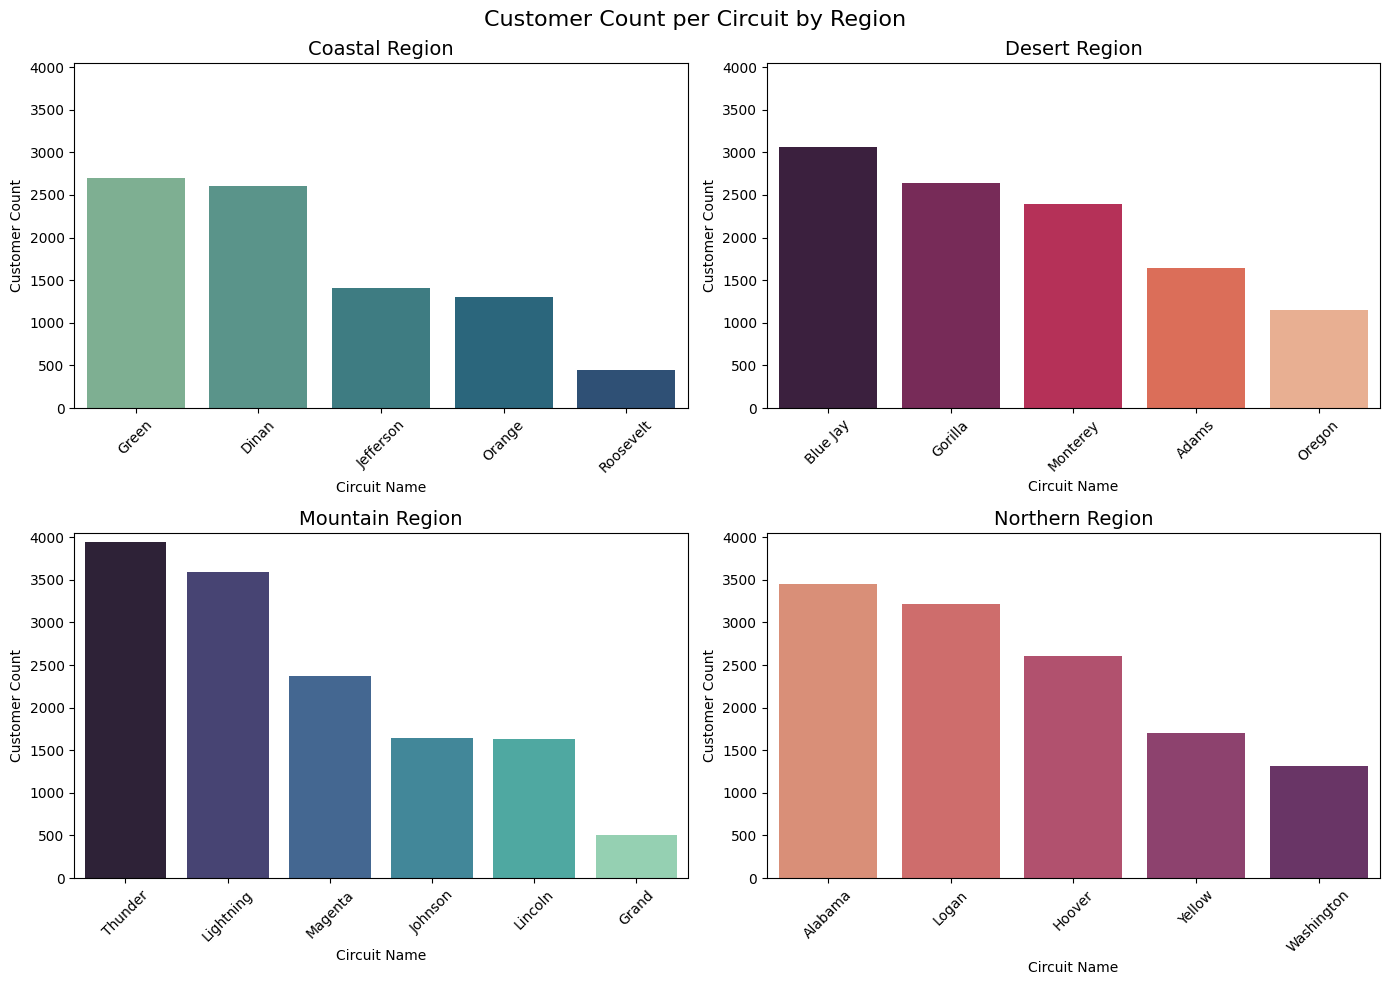

In [27]:
# Sort circuit dataframe for consistent visuals
circuit_copy = circuit.copy().sort_values(by='circuit_name')

# Split into regions
coastal = circuit_copy[circuit_copy['region'] == 'Coastal'].sort_values(by='customer_count', ascending=False)
desert = circuit_copy[circuit_copy['region'] == 'Desert'].sort_values(by='customer_count', ascending=False)
mountain = circuit_copy[circuit_copy['region'] == 'Mountain'].sort_values(by='customer_count', ascending=False)
north = circuit_copy[circuit_copy['region'] == 'North'].sort_values(by='customer_count', ascending=False)

# Determine a common y-axis limit for visual consistency
max_customer_count = circuit_copy['customer_count'].max() + 100  # small padding

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Coastal - Crest
sns.barplot(
    data=coastal,
    x='circuit_name',
    y='customer_count',
    palette='crest',
    ax=axs[0][0],
    legend=False
)
axs[0][0].set_title('Coastal Region', fontsize=14)
axs[0][0].tick_params(rotation=45, axis='x')
axs[0][0].set_ylim(0, max_customer_count)
axs[0][0].set_xlabel("Circuit Name")
axs[0][0].set_ylabel("Customer Count")

# Desert - Rocket
sns.barplot(
    data=desert,
    x='circuit_name',
    y='customer_count',
    palette='rocket',
    ax=axs[0][1],
    legend=False
)
axs[0][1].set_title('Desert Region', fontsize=14)
axs[0][1].tick_params(rotation=45, axis='x')
axs[0][1].set_ylim(0, max_customer_count)
axs[0][1].set_xlabel("Circuit Name")
axs[0][1].set_ylabel("Customer Count")

# Mountain - Mako
sns.barplot(
    data=mountain,
    x='circuit_name',
    y='customer_count',
    palette='mako',
    ax=axs[1][0],
    legend=False
)
axs[1][0].set_title('Mountain Region', fontsize=14)
axs[1][0].tick_params(rotation=45, axis='x')
axs[1][0].set_ylim(0, max_customer_count)
axs[1][0].set_xlabel("Circuit Name")
axs[1][0].set_ylabel("Customer Count")

# Northern - Flare
sns.barplot(
    data=north,
    x='circuit_name',
    y='customer_count',
    palette='flare',
    ax=axs[1][1],
    legend=False
)
axs[1][1].set_title('Northern Region', fontsize=14)
axs[1][1].tick_params(rotation=45, axis='x')
axs[1][1].set_ylim(0, max_customer_count)
axs[1][1].set_xlabel("Circuit Name")
axs[1][1].set_ylabel("Customer Count")

# Final layout tweaks
plt.suptitle('Customer Count per Circuit by Region', fontsize=16)
plt.tight_layout()
plt.show()


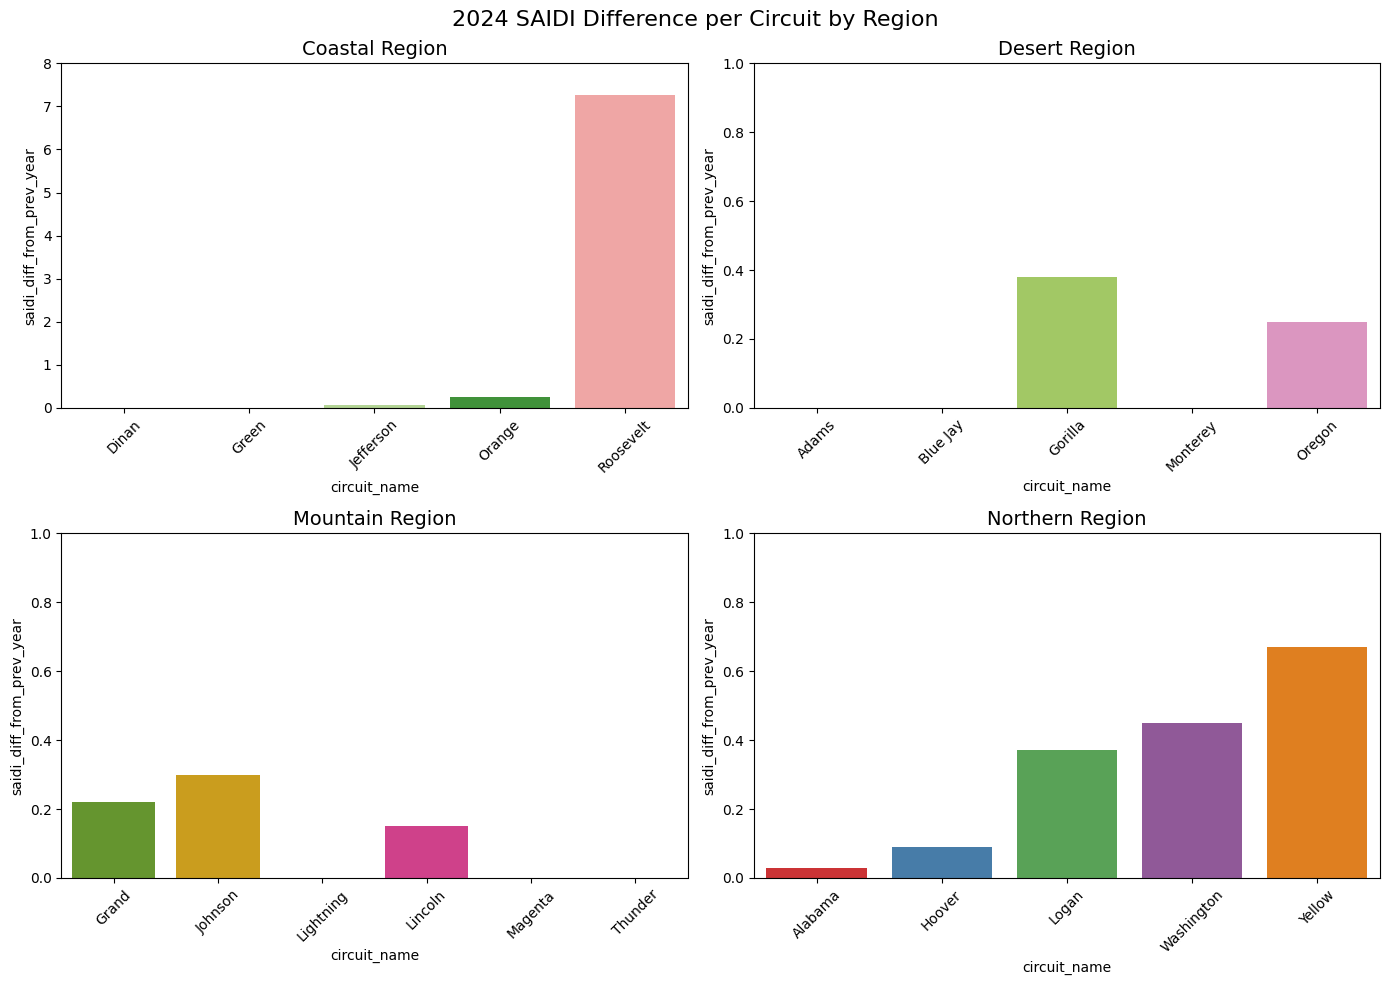

In [28]:
# said difference from pervious year 
circuit_copy = circuit.copy().sort_values(by = 'circuit_name')

coastal = circuit_copy[ circuit_copy['region'] == 'Coastal' ]
desert = circuit_copy[ circuit_copy['region'] == 'Desert' ]
mountain = circuit_copy[ circuit_copy['region'] == 'Mountain' ]
north = circuit_copy[ circuit_copy['region'] == 'North' ]

region_palette = {'coastal':'Paired', 'desert':'Set2', 'mountain':'Dark2', 'north':'Set1'}
palette = 'tab10'
fig, axs = plt.subplots(2,2, figsize = (14,10) )

sns.barplot(coastal, x = coastal['circuit_name'], y=coastal['saidi_diff_from_prev_year'], hue = coastal['saidi_diff_from_prev_year'], palette = 'Paired', ax = axs[0][0], legend=False )
axs[0][0].set_title('Coastal Region', fontsize=14)
axs[0][0].tick_params(rotation = 45, axis = 'x')
axs[0][0].set_ylim(0,8)

sns.barplot(desert, x = desert['circuit_name'], y=desert['saidi_diff_from_prev_year'], hue = desert['saidi_diff_from_prev_year'], palette = 'Set2', ax = axs[0][1], legend=False)
axs[0][1].set_title('Desert Region', fontsize=14)
axs[0][1].tick_params(rotation = 45, axis = 'x')
axs[0][1].set_ylim(0,1)

sns.barplot(mountain, x = mountain['circuit_name'], y=mountain['saidi_diff_from_prev_year'], hue = mountain['saidi_diff_from_prev_year'], palette = 'Dark2', ax = axs[1][0], legend=False)
axs[1][0].set_title('Mountain Region', fontsize=14)
axs[1][0].tick_params(rotation = 45, axis = 'x')
axs[1][0].set_ylim(0,1)

sns.barplot(north, x = north['circuit_name'], y=north['saidi_diff_from_prev_year'], hue = north['saidi_diff_from_prev_year'], palette = 'Set1', ax = axs[1][1], legend=False)
axs[1][1].set_title('Northern Region', fontsize=14)
axs[1][1].tick_params(rotation = 45, axis = 'x')
axs[1][1].set_ylim(0,1)

plt.suptitle('2024 SAIDI Difference per Circuit by Region', fontsize=16)
plt.tight_layout()

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/370973179.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['saidi_proportion'] = region_df['saidi_2024'] / max_val
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/370973179.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['saidi_proportion'] = region_df['saidi_2024'] / max_val
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/370973179.py:12: SettingWithCopyWarning: 
A value is trying to

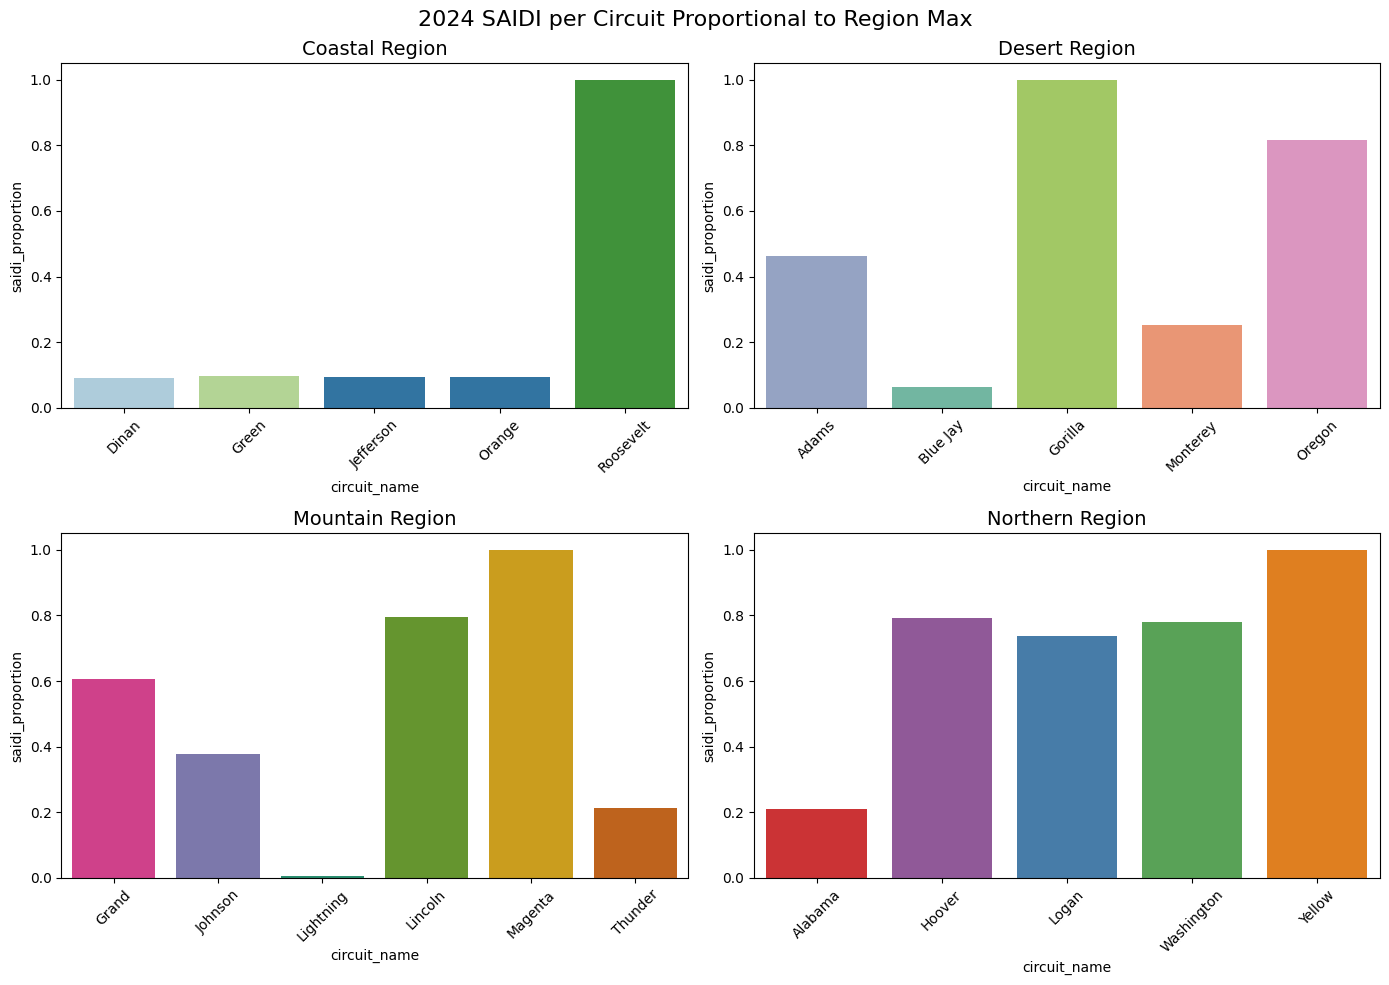

In [29]:
circuit_copy = circuit.copy().sort_values(by = 'circuit_name')

coastal = circuit_copy[ circuit_copy['region'] == 'Coastal' ]
desert = circuit_copy[ circuit_copy['region'] == 'Desert' ]
mountain = circuit_copy[ circuit_copy['region'] == 'Mountain' ]
north = circuit_copy[ circuit_copy['region'] == 'North' ]
region_palette = {'coastal':'Paired', 'desert':'Set2', 'mountain':'Dark2', 'north':'Set1'}

# Per-region normalization by max
for region_df in [coastal, desert, mountain, north]:
    max_val = region_df['saidi_2024'].max()
    region_df['saidi_proportion'] = region_df['saidi_2024'] / max_val


# coastal['saidi_2024'].max()
fig, axs = plt.subplots(2,2,figsize = (14,10))

sns.barplot(coastal, x = 'circuit_name', y='saidi_proportion', hue = coastal['saidi_2024'], palette = region_palette['coastal'], ax = axs[0][0], legend = False)
axs[0][0].set_title('Coastal Region', fontsize=14)
axs[0][0].tick_params(rotation = 45, axis = 'x')
# axs[0][0].set_ylim(0,max_saidi)

sns.barplot(desert, x = 'circuit_name', y='saidi_proportion', hue = desert['saidi_2024'], palette = region_palette['desert'], ax = axs[0][1],legend = False)
axs[0][1].set_title('Desert Region', fontsize=14)
axs[0][1].tick_params(rotation = 45, axis = 'x')
# axs[0][1].set_ylim(0,max_saidi)

sns.barplot(mountain, x = 'circuit_name', y='saidi_proportion', hue = mountain['saidi_2024'], palette = region_palette['mountain'], ax = axs[1][0],legend = False)
axs[1][0].set_title('Mountain Region', fontsize=14)
axs[1][0].tick_params(rotation = 45, axis = 'x')
# axs[1][0].set_ylim(0,max_saidi)

sns.barplot(north, x = 'circuit_name', y='saidi_proportion', hue = north['saidi_2024'], palette = region_palette['north'], ax = axs[1][1],legend = False)
axs[1][1].set_title('Northern Region', fontsize=14)
axs[1][1].tick_params(rotation = 45, axis = 'x')
# axs[1][1].set_ylim(0,max_saidi)

plt.suptitle('2024 SAIDI per Circuit Proportional to Region Max', fontsize=16)
plt.tight_layout()

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/1856072556.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coastal, x='circuit_name', y='saifi_2024', palette=region_palette['coastal'], ax=axs[0][0])
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/1856072556.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=desert, x='circuit_name', y='saifi_2024', palette=region_palette['desert'], ax=axs[0][1])
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/1856072556.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the

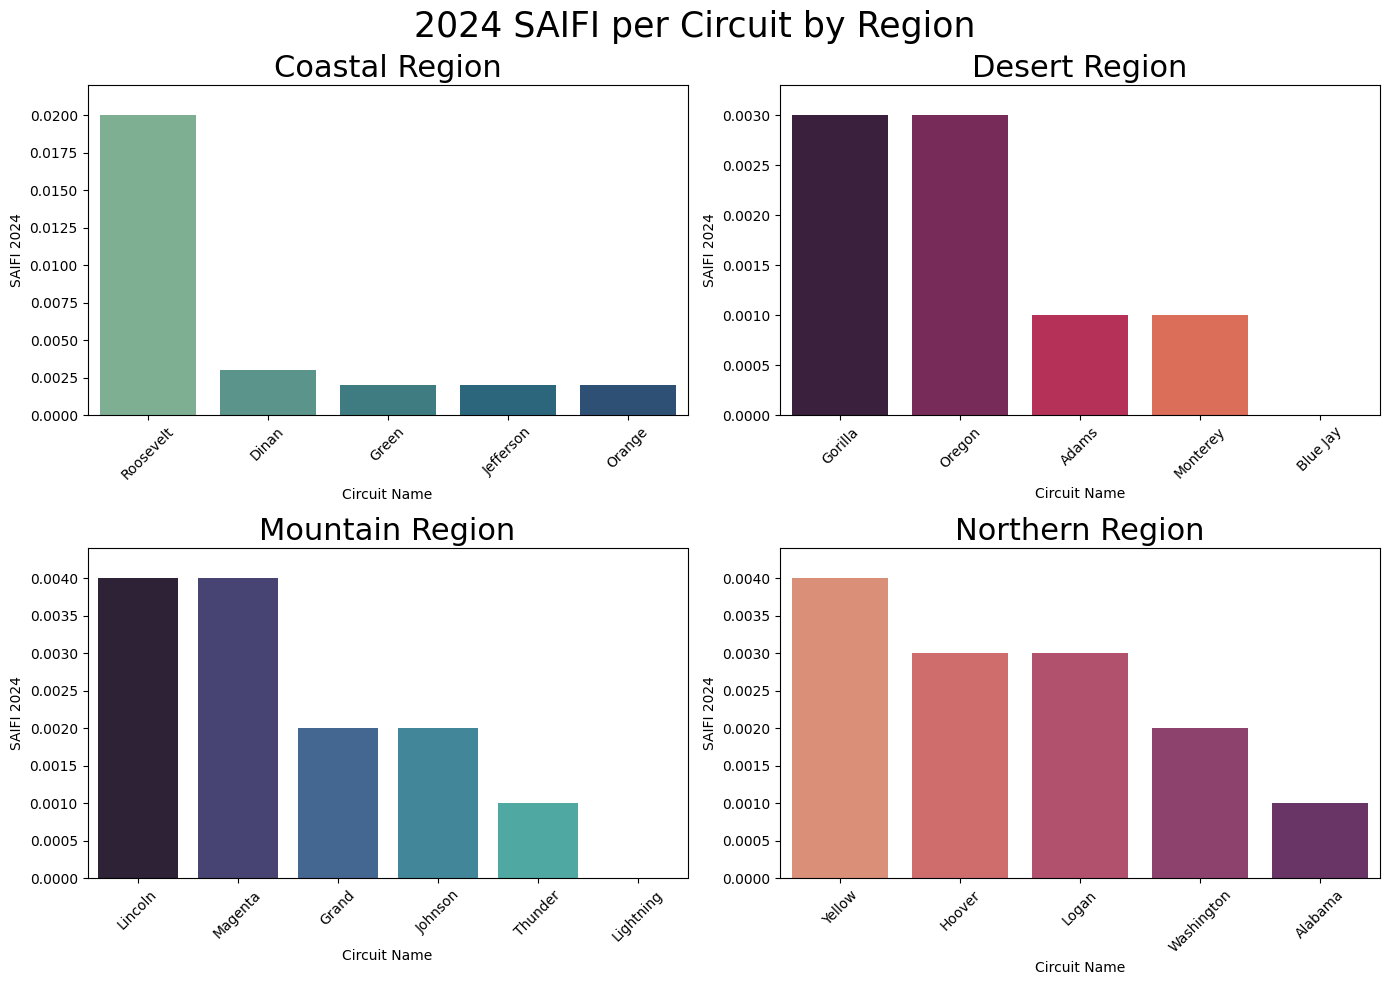

In [102]:
circuit_copy = circuit.copy().sort_values(by='circuit_name')

coastal = circuit_copy[circuit_copy['region'] == 'Coastal'].sort_values(by='saifi_2024', ascending=False)
desert = circuit_copy[circuit_copy['region'] == 'Desert'].sort_values(by='saifi_2024', ascending=False)
mountain = circuit_copy[circuit_copy['region'] == 'Mountain'].sort_values(by='saifi_2024', ascending=False)
north = circuit_copy[circuit_copy['region'] == 'North'].sort_values(by='saifi_2024', ascending=False)

# Define palettes
region_palette = {
    'coastal': 'crest',
    'desert': 'rocket',
    'mountain': 'mako',
    'north': 'flare'
}

# Determine max SAIFI per region with slight padding
max_coastal = coastal['saifi_2024'].max() * 1.1
max_desert = desert['saifi_2024'].max() * 1.1
max_mountain = mountain['saifi_2024'].max() * 1.1
max_north = north['saifi_2024'].max() * 1.1

# Plot setup
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Coastal - Crest
sns.barplot(data=coastal, x='circuit_name', y='saifi_2024', palette=region_palette['coastal'], ax=axs[0][0])
axs[0][0].set_title('Coastal Region', fontsize=22)
axs[0][0].tick_params(rotation=45, axis='x')
axs[0][0].set_ylim(0, max_coastal)
axs[0][0].set_xlabel("Circuit Name")
axs[0][0].set_ylabel("SAIFI 2024")

# Desert - Rocket
sns.barplot(data=desert, x='circuit_name', y='saifi_2024', palette=region_palette['desert'], ax=axs[0][1])
axs[0][1].set_title('Desert Region', fontsize=22)
axs[0][1].tick_params(rotation=45, axis='x')
axs[0][1].set_ylim(0, max_desert)
axs[0][1].set_xlabel("Circuit Name")
axs[0][1].set_ylabel("SAIFI 2024")

# Mountain - Mako
sns.barplot(data=mountain, x='circuit_name', y='saifi_2024', palette=region_palette['mountain'], ax=axs[1][0])
axs[1][0].set_title('Mountain Region', fontsize=22)
axs[1][0].tick_params(rotation=45, axis='x')
axs[1][0].set_ylim(0, max_mountain)
axs[1][0].set_xlabel("Circuit Name")
axs[1][0].set_ylabel("SAIFI 2024")

# Northern - Flare
sns.barplot(data=north, x='circuit_name', y='saifi_2024', palette=region_palette['north'], ax=axs[1][1])
axs[1][1].set_title('Northern Region', fontsize=22)
axs[1][1].tick_params(rotation=45, axis='x')
axs[1][1].set_ylim(0, max_north)
axs[1][1].set_xlabel("Circuit Name")
axs[1][1].set_ylabel("SAIFI 2024")

# Final layout
plt.suptitle('2024 SAIFI per Circuit by Region', fontsize=25)
plt.tight_layout()
plt.show()

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/209971972.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/209971972.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/209971972.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/209971972.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

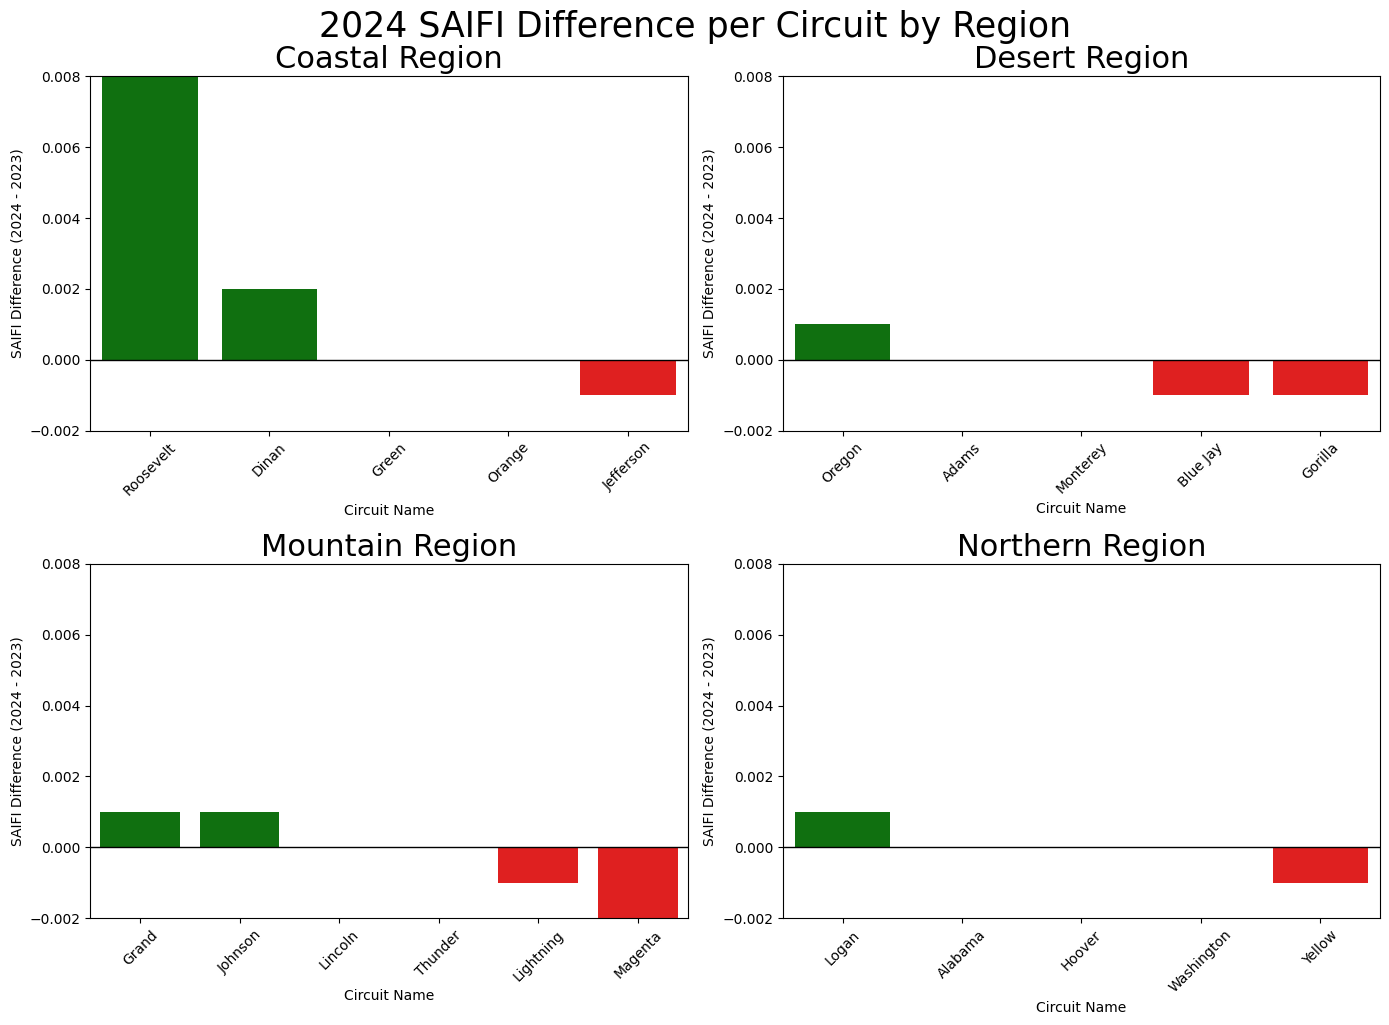

In [106]:


# Copy and sort circuit data
circuit_copy = circuit.copy()
circuit_copy = circuit_copy.sort_values(by='circuit_name')

# Color mapping: green for increase, red for decrease
def color_map(values):
    return ['green' if v >= 0 else 'red' for v in values]

# Split and sort each region by SAIFI difference descending
coastal = circuit_copy[circuit_copy['region'] == 'Coastal'].sort_values(by='saifi_diff_from_prev_year', ascending=False)
desert = circuit_copy[circuit_copy['region'] == 'Desert'].sort_values(by='saifi_diff_from_prev_year', ascending=False)
mountain = circuit_copy[circuit_copy['region'] == 'Mountain'].sort_values(by='saifi_diff_from_prev_year', ascending=False)
north = circuit_copy[circuit_copy['region'] == 'North'].sort_values(by='saifi_diff_from_prev_year', ascending=False)

# Global y-axis limits with padding
global_min = min(circuit_copy['saifi_diff_from_prev_year'].min(), 0) 
global_max = max(circuit_copy['saifi_diff_from_prev_year'].max(), 0)

# Plot setup
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Regions list for easy loop
regions_data = [coastal, desert, mountain, north]
region_titles = ['Coastal Region', 'Desert Region', 'Mountain Region', 'Northern Region']

# Loop through regions
for i, (region_df, title) in enumerate(zip(regions_data, region_titles)):
    sns.barplot(
        data=region_df,
        x='circuit_name',
        y='saifi_diff_from_prev_year',
        palette=color_map(region_df['saifi_diff_from_prev_year']),
        ax=axs[i]
    )
    axs[i].set_title(title, fontsize=22)
    axs[i].tick_params(rotation=45, axis='x')
    axs[i].set_ylim(global_min, global_max)
    axs[i].set_ylabel('SAIFI Difference (2024 - 2023)')
    axs[i].set_xlabel('Circuit Name')
    axs[i].axhline(0, color='black', linewidth=1)

# Layout adjustments
plt.tight_layout()

# Add big title AFTER tight_layout
plt.suptitle('2024 SAIFI Difference per Circuit by Region', fontsize=25, y=1.02)

plt.show()


/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/1230681984.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['saifi_proportion'] = region_df['saifi_2024'] / max_val
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/1230681984.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['saifi_proportion'] = region_df['saifi_2024'] / max_val
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/1230681984.py:13: SettingWithCopyWarning: 
A value is trying

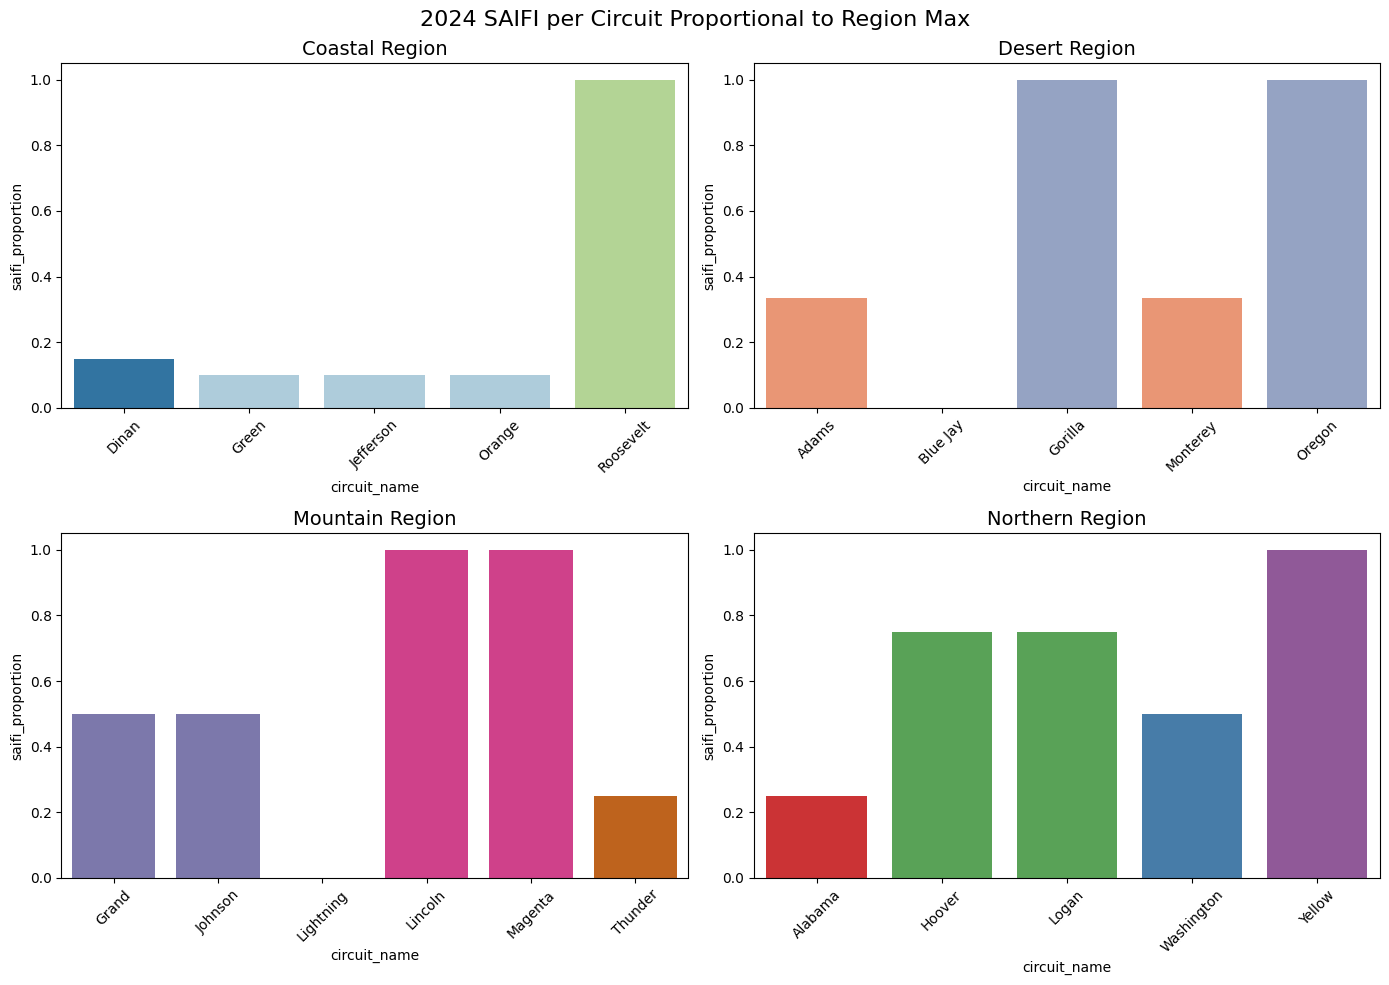

In [31]:
# normalized saifi 
circuit_copy = circuit.copy().sort_values(by = 'circuit_name')

coastal = circuit_copy[ circuit_copy['region'] == 'Coastal' ]
desert = circuit_copy[ circuit_copy['region'] == 'Desert' ]
mountain = circuit_copy[ circuit_copy['region'] == 'Mountain' ]
north = circuit_copy[ circuit_copy['region'] == 'North' ]
region_palette={'coastal':'Paired', 'desert':'Set2', 'mountain':'Dark2', 'north':'Set1'}

# Per-region normalization by max
for region_df in [coastal, desert, mountain, north]:
    max_val = region_df['saifi_2024'].max()
    region_df['saifi_proportion'] = region_df['saifi_2024'] / max_val



fig, axs = plt.subplots(2,2,figsize = (14,10))

sns.barplot(coastal, x = 'circuit_name', y='saifi_proportion', hue = coastal['saifi_2024'], palette = region_palette['coastal'], ax = axs[0][0], legend = False)
axs[0][0].set_title('Coastal Region', fontsize=14)
axs[0][0].tick_params(rotation = 45, axis = 'x')
# axs[0][0].set_ylim(0,max_saidi)

sns.barplot(desert, x = 'circuit_name', y='saifi_proportion', hue = desert['saifi_2024'], palette = region_palette['desert'], ax = axs[0][1],legend = False)
axs[0][1].set_title('Desert Region', fontsize=14)
axs[0][1].tick_params(rotation = 45, axis = 'x')
# axs[0][1].set_ylim(0,max_saidi)

sns.barplot(mountain, x = 'circuit_name', y='saifi_proportion', hue = mountain['saifi_2024'], palette = region_palette['mountain'], ax = axs[1][0],legend = False)
axs[1][0].set_title('Mountain Region', fontsize=14)
axs[1][0].tick_params(rotation = 45, axis = 'x')
# axs[1][0].set_ylim(0,max_saidi)

sns.barplot(north, x = 'circuit_name', y='saifi_proportion', hue = north['saifi_2024'], palette = region_palette['north'], ax = axs[1][1],legend = False)
axs[1][1].set_title('Northern Region', fontsize=14)
axs[1][1].tick_params(rotation = 45, axis = 'x')
# axs[1][1].set_ylim(0,max_saidi)

plt.suptitle('2024 SAIFI per Circuit Proportional to Region Max', fontsize=16)
plt.tight_layout()

In [32]:
#  Outage Cause Median Duration Per Outage - 2024
outage_cause_median_duration = (
    df
    .groupby('outage_cause')['outage_duration']
    .median()
    .reset_index(name='median_duration')
    .sort_values(by='median_duration', ascending = False)
    .reset_index(drop=True)
)
outage_cause_median_duration

,outage_cause,median_duration
0,Operation,935.5
1,Third Party,926.5
2,Animal,868.0
3,Other,837.0
4,Weather,760.0
5,UG Equipment Failure,651.5
6,OH Equipment Failure,555.0
7,Vegetation,410.0


In [33]:
#  Average CMI per outage per outage cause 

outage_cause_avg_cmi = (
    df
    .groupby('outage_cause')['cmi']
    .mean()
    .reset_index(name='average_cmi_per_outage')
    .sort_values(by='average_cmi_per_outage', ascending = False)
    .reset_index(drop=True)
)

outage_cause_avg_cmi['average_cmi_per_outage'] = (
    outage_cause_avg_cmi['average_cmi_per_outage'].round(2)
)
outage_cause_avg_cmi



,outage_cause,average_cmi_per_outage
0,Animal,1104097.57
1,Third Party,1011896.50
2,Other,819142.27
3,UG Equipment Failure,782651.08
4,Operation,713754.40
5,OH Equipment Failure,671559.12
6,Weather,458098.42
7,Vegetation,445867.20


In [34]:
# Median CMI per outage cause per outage 
outage_cause_median_cmi = (
    df
    .groupby('outage_cause')['cmi']
    .median()
    .reset_index(name='median_cmi_per_outage')
    .sort_values(by='median_cmi_per_outage', ascending = False)
    .reset_index(drop=True)
)

outage_cause_median_cmi['median_cmi_per_outage'] = (
    outage_cause_median_cmi['median_cmi_per_outage'].round(2)
)
outage_cause_median_cmi

,outage_cause,median_cmi_per_outage
0,Third Party,840316.5
1,Animal,806382.0
2,Vegetation,512820.0
3,Operation,488365.0
4,Other,472524.0
5,UG Equipment Failure,401674.0
6,Weather,357557.5
7,OH Equipment Failure,350020.0


In [35]:
# Total CMI per outage cause 
outage_cause_total_cmi = (
    df
    .groupby('outage_cause')['cmi']
    .median()
    .reset_index(name='total_cmi')
    .sort_values(by='total_cmi', ascending = False)
    .reset_index(drop=True)
)

outage_cause_total_cmi['total_cmi'] = (
    outage_cause_total_cmi['total_cmi'].round(2)
)
outage_cause_total_cmi

,outage_cause,total_cmi
0,Third Party,840316.5
1,Animal,806382.0
2,Vegetation,512820.0
3,Operation,488365.0
4,Other,472524.0
5,UG Equipment Failure,401674.0
6,Weather,357557.5
7,OH Equipment Failure,350020.0


/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/2583764736.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


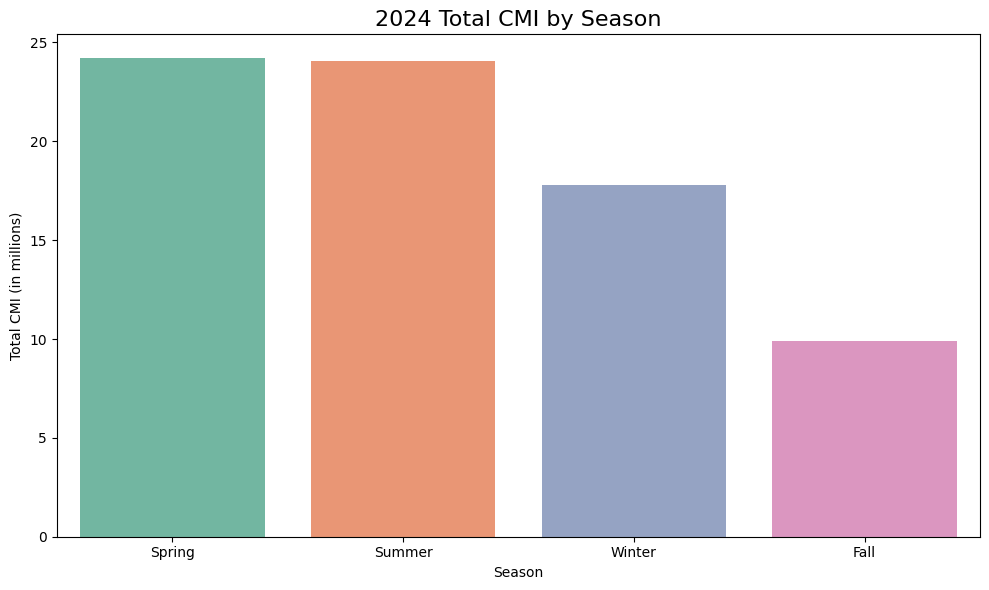

In [36]:
season_cmi = (
    df.groupby('season')['cmi']
    .sum()
    .reset_index()
)

# Scale CMI to millions
season_cmi['cmi'] = season_cmi['cmi'] / 1_000_000

# Sort seasons by total CMI descending
season_cmi = season_cmi.sort_values(by='cmi', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=season_cmi,
    x='season',
    y='cmi',
    palette='Set2'
)

plt.title("2024 Total CMI by Season", fontsize=16)
plt.xlabel("Season")
plt.ylabel("Total CMI (in millions)")
plt.tight_layout()
plt.show()


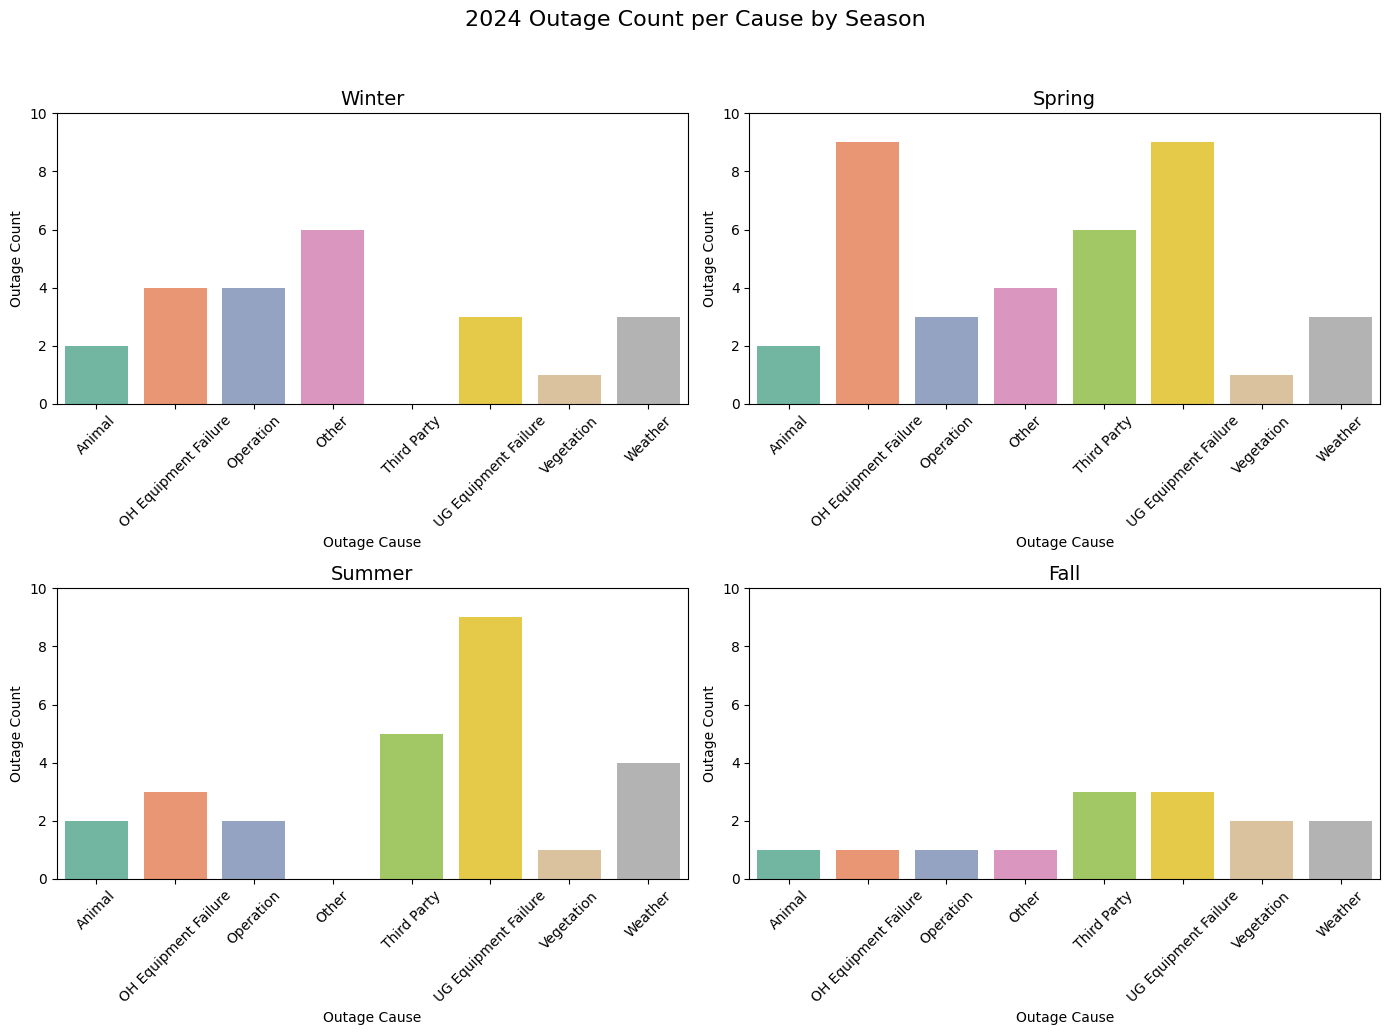

In [37]:
# Outage Cause Per Season
outage_cause_per_season = (
    df
    .groupby(['season', 'outage_cause'])
    .size()
    .reset_index(name='outage_count')
    # .sort_values(by=['season', 'outage_count'], ascending = False)
    # .reset_index(drop=True)
)

# max_count = outage_cause_per_season["outage_count"].max()
max_count = 10

# Then in each subplot, add:




palette = sns.color_palette("Set2")

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

winter = outage_cause_per_season[outage_cause_per_season["season"] == "Winter"]
spring =  outage_cause_per_season[outage_cause_per_season["season"] == "Spring"]
summer =  outage_cause_per_season[outage_cause_per_season["season"] == "Summer"]
fall =  outage_cause_per_season[outage_cause_per_season["season"] == "Fall"]

all_causes = sorted(outage_cause['outage_cause'])
def fill_missing_causes(df_season):
    return (
        df_season.set_index('outage_cause')
        .reindex(all_causes, fill_value=0)
        .reset_index()
    )
winter = fill_missing_causes(winter)
spring = fill_missing_causes(spring)
summer = fill_missing_causes(summer)
fall   = fill_missing_causes(fall)



sns.barplot(
    winter,
    x = 'outage_cause',
    y = 'outage_count',
    hue = 'outage_cause',
    palette = palette,
    ax=axs[0,0]
)
axs[0][0].set_title('Winter', fontsize=14)
axs[0][0].tick_params(rotation = 45, axis = 'x')
axs[0, 0].set_ylim(0, max_count)
axs[0][0].set_xlabel("Outage Cause")
axs[0][0].set_ylabel("Outage Count")

sns.barplot(
    spring,
    x = 'outage_cause',
    y = 'outage_count',
    hue = 'outage_cause',
    palette = palette,
    ax=axs[0,1]
)
axs[0][1].set_title('Spring', fontsize=14)
axs[0][1].tick_params(rotation = 45, axis = 'x')
axs[0, 1].set_ylim(0, max_count)
axs[0][1].set_xlabel("Outage Cause")
axs[0][1].set_ylabel("Outage Count")

sns.barplot(
    summer,
    x = 'outage_cause',
    y = 'outage_count',
    hue = 'outage_cause',
    palette = palette,
    ax=axs[1,0]
)
axs[1][0].set_title('Summer', fontsize=14)
axs[1][0].tick_params(rotation = 45, axis = 'x')
axs[1, 0].set_ylim(0, max_count)
axs[1][0].set_xlabel("Outage Cause")
axs[1][0].set_ylabel("Outage Count")

sns.barplot(
    fall,
    x = 'outage_cause',
    y = 'outage_count',
    hue = 'outage_cause',
    palette = palette,
    ax=axs[1,1]
)
axs[1][1].set_title('Fall', fontsize=14)
axs[1][1].tick_params(rotation = 45, axis = 'x')
axs[1, 1].set_ylim(0, max_count)
axs[1][1].set_xlabel("Outage Cause")
axs[1][1].set_ylabel("Outage Count")

plt.suptitle("2024 Outage Count per Cause by Season", fontsize=16, y=1.03) 
plt.tight_layout()

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/743474791.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/743474791.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/743474791.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/743474791.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

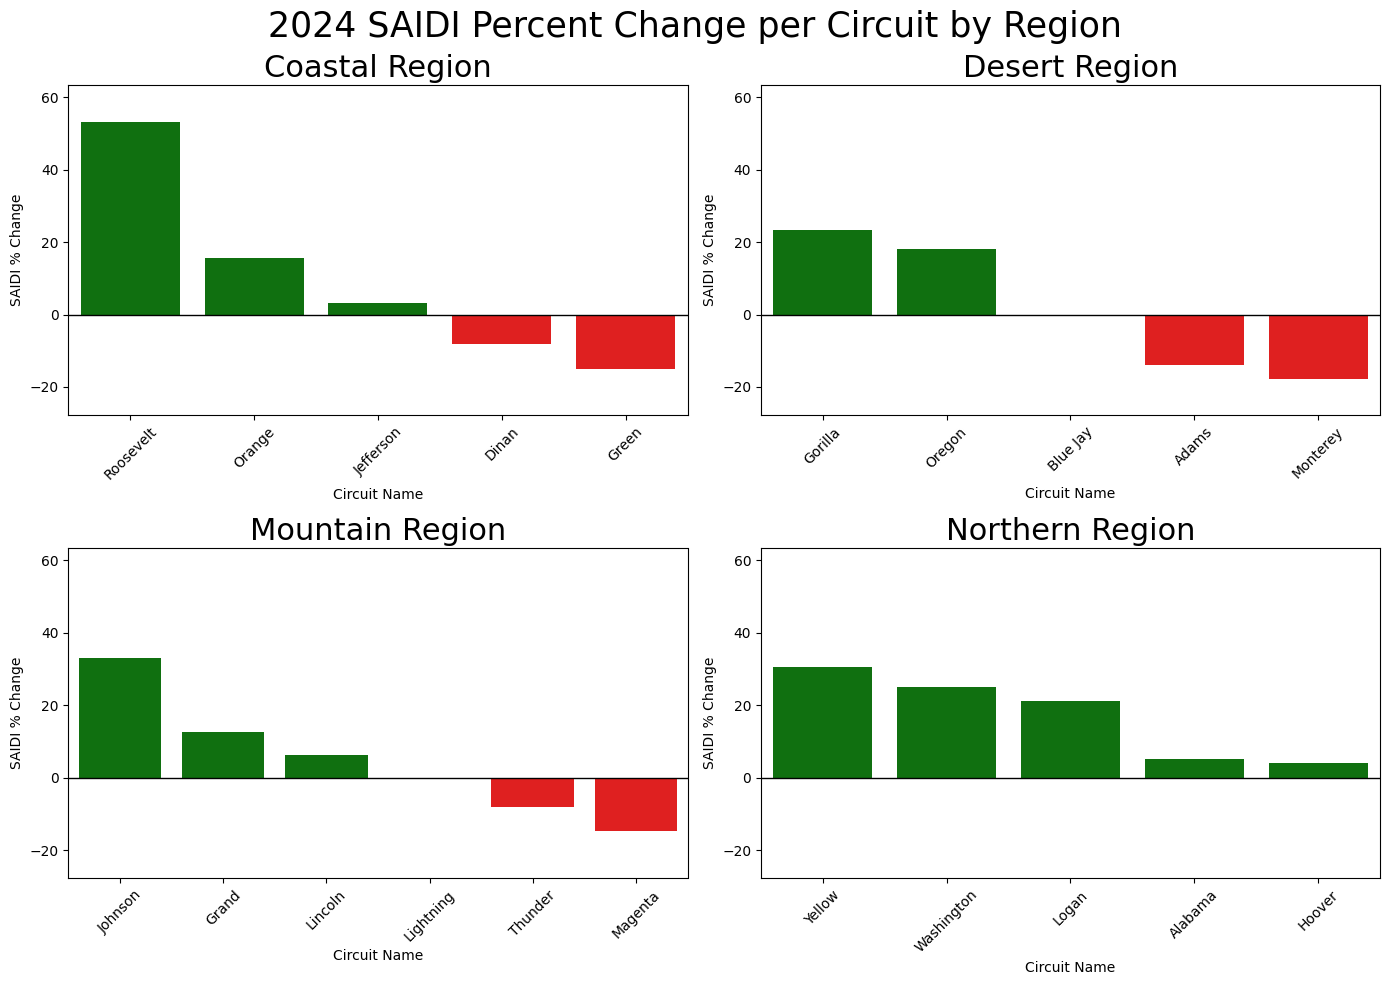

In [100]:
circuit_copy = circuit.copy()
circuit_copy['saidi_percent_change_from_prev_year'] = (
    circuit_copy['saidi_diff_from_prev_year'] / circuit_copy['saidi_2023']
) * 100

# Sort for consistent plotting
circuit_copy = circuit_copy.sort_values(by='circuit_name')

# Define a function to assign colors
def color_map(values):
    return ['green' if v >= 0 else 'red' for v in values]

# Split and sort each region by percent change descending
coastal = circuit_copy[circuit_copy['region'] == 'Coastal'].sort_values(by='saidi_percent_change_from_prev_year', ascending=False)
desert = circuit_copy[circuit_copy['region'] == 'Desert'].sort_values(by='saidi_percent_change_from_prev_year', ascending=False)
mountain = circuit_copy[circuit_copy['region'] == 'Mountain'].sort_values(by='saidi_percent_change_from_prev_year', ascending=False)
north = circuit_copy[circuit_copy['region'] == 'North'].sort_values(by='saidi_percent_change_from_prev_year', ascending=False)

# Determine global y-axis limits
global_min = circuit_copy['saidi_percent_change_from_prev_year'].min()
global_max = circuit_copy['saidi_percent_change_from_prev_year'].max()
global_min = min(global_min, 0) - 10
global_max = max(global_max, 0) + 10

# Plot setup
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Coastal
sns.barplot(
    data=coastal,
    x='circuit_name',
    y='saidi_percent_change_from_prev_year',
    palette=color_map(coastal['saidi_percent_change_from_prev_year']),
    ax=axs[0][0]
)
axs[0][0].set_title('Coastal Region', fontsize=22)
axs[0][0].tick_params(rotation=45, axis='x')
axs[0][0].set_ylim(global_min, global_max)
axs[0][0].set_ylabel('SAIDI % Change')
axs[0][0].set_xlabel('Circuit Name')
axs[0][0].axhline(0, color='black', linewidth=1)

# Desert
sns.barplot(
    data=desert,
    x='circuit_name',
    y='saidi_percent_change_from_prev_year',
    palette=color_map(desert['saidi_percent_change_from_prev_year']),
    ax=axs[0][1]
)
axs[0][1].set_title('Desert Region', fontsize=22)
axs[0][1].tick_params(rotation=45, axis='x')
axs[0][1].set_ylim(global_min, global_max)
axs[0][1].set_ylabel('SAIDI % Change')
axs[0][1].set_xlabel('Circuit Name')
axs[0][1].axhline(0, color='black', linewidth=1)

# Mountain
sns.barplot(
    data=mountain,
    x='circuit_name',
    y='saidi_percent_change_from_prev_year',
    palette=color_map(mountain['saidi_percent_change_from_prev_year']),
    ax=axs[1][0]
)
axs[1][0].set_title('Mountain Region', fontsize=22)
axs[1][0].tick_params(rotation=45, axis='x')
axs[1][0].set_ylim(global_min, global_max)
axs[1][0].set_ylabel('SAIDI % Change')
axs[1][0].set_xlabel('Circuit Name')
axs[1][0].axhline(0, color='black', linewidth=1)

# Northern
sns.barplot(
    data=north,
    x='circuit_name',
    y='saidi_percent_change_from_prev_year',
    palette=color_map(north['saidi_percent_change_from_prev_year']),
    ax=axs[1][1]
)
axs[1][1].set_title('Northern Region', fontsize=22)
axs[1][1].tick_params(rotation=45, axis='x')
axs[1][1].set_ylim(global_min, global_max)
axs[1][1].set_ylabel('SAIDI % Change')
axs[1][1].set_xlabel('Circuit Name')
axs[1][1].axhline(0, color='black', linewidth=1)

# Title and layout
plt.suptitle('2024 SAIDI Percent Change per Circuit by Region', fontsize=25)
plt.tight_layout()
plt.show()



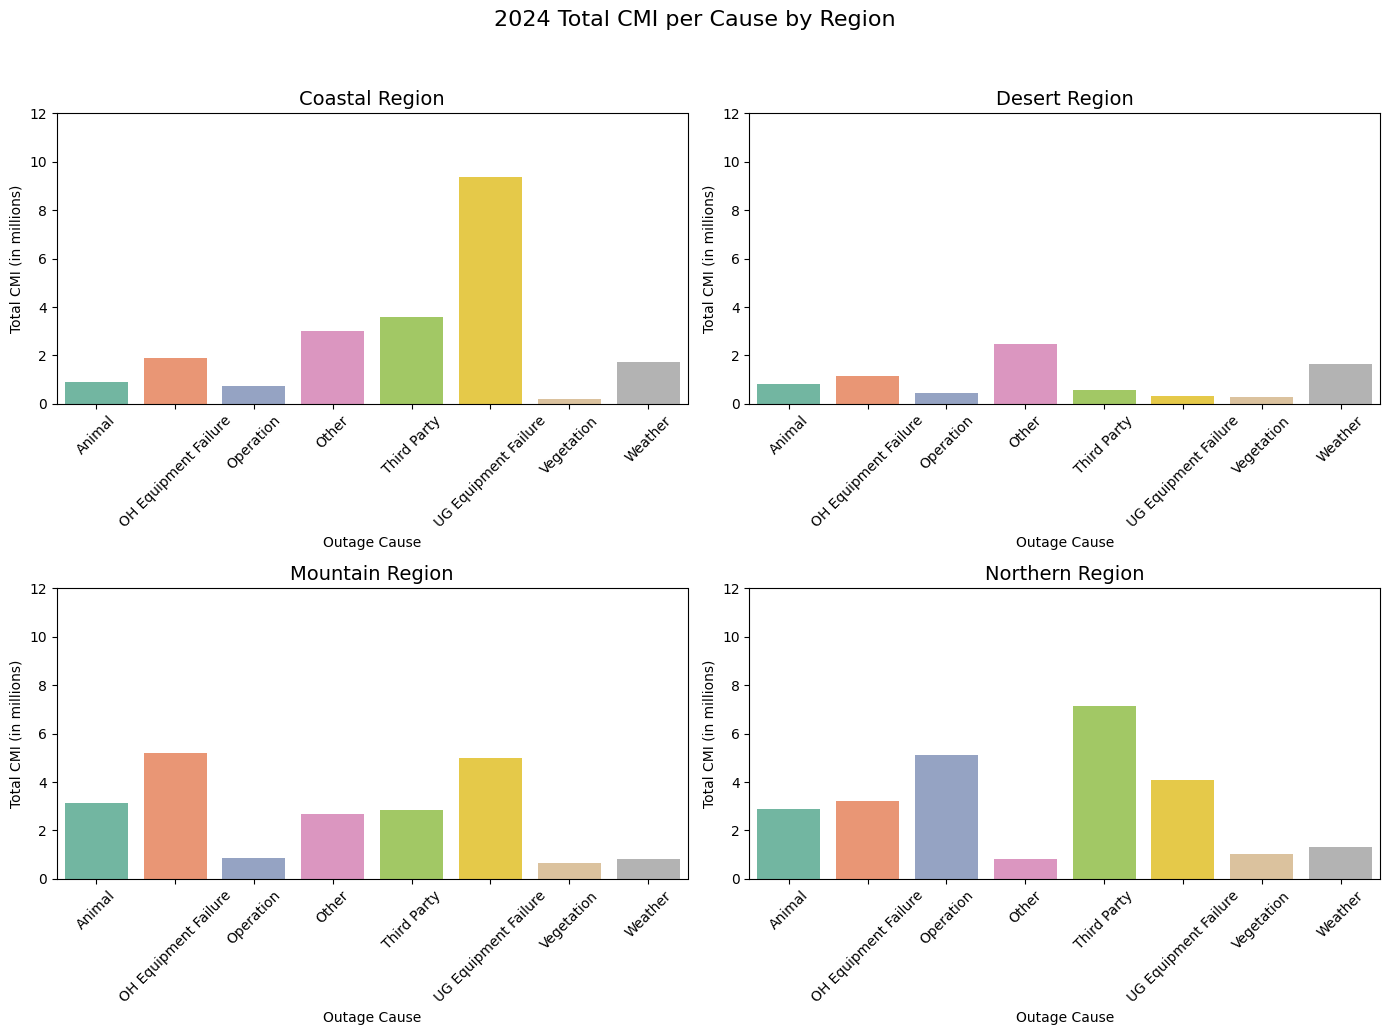

In [39]:
# Group by region and outage cause and sum the CMI
cmi_by_region = (
    df
    .groupby(['region', 'outage_cause'])['cmi']
    .sum()
    .reset_index(name='total_cmi')
    .sort_values(by=['region', 'total_cmi'], ascending=False)
    .reset_index(drop=True)
)

# Get the max CMI value for consistent y-axis
max_cmi = cmi_by_region['total_cmi'].max()

# List of all causes for alignment
all_causes = sorted(df['outage_cause'].unique())

# Function to fill missing causes with 0
def fill_missing_causes(df):
    return (
        df.set_index('outage_cause')
        .reindex(all_causes, fill_value=0)
        .reset_index()
    )

# Create regional subsets
coastal = fill_missing_causes(cmi_by_region[cmi_by_region["region"] == "Coastal"])
desert = fill_missing_causes(cmi_by_region[cmi_by_region["region"] == "Desert"])
mountain = fill_missing_causes(cmi_by_region[cmi_by_region["region"] == "Mountain"])
north = fill_missing_causes(cmi_by_region[cmi_by_region["region"] == "North"])

coastal['total_cmi'] = coastal['total_cmi'] / 1000000
desert['total_cmi'] = desert['total_cmi'] / 1000000
mountain['total_cmi'] = mountain['total_cmi'] / 1000000
north['total_cmi'] = north['total_cmi'] / 1000000

# Plot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for ax, data, title in zip(
    axs.flat,
    [coastal, desert, mountain, north],
    ['Coastal Region', 'Desert Region', 'Mountain Region', 'Northern Region']
):
    sns.barplot(
        data=data,
        x='outage_cause',
        y='total_cmi',
        hue='outage_cause',
        palette='Set2',
        ax=ax
    )
    ax.set_title(title, fontsize=14)
    ax.tick_params(rotation=45, axis='x')
    ax.set_ylim(0, 12)
    ax.set_xlabel("Outage Cause")
    ax.set_ylabel("Total CMI (in millions)")

plt.suptitle("2024 Total CMI per Cause by Region", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()


In [40]:
# Outage Cause Per Season by region
outage_cause_per_season_by_region = (
    df
    .groupby(['region', 'season', 'outage_cause'])
    .size()
    .reset_index(name='outage_count')
)

top_outage_cause_per_season = (
    outage_cause_per_season_by_region
    .sort_values(['region', 'season', 'outage_count'], ascending=[True, True, False])
    .groupby(['region', 'season'], as_index=False)
    .first()
)

top_outage_cause_per_season

,region,season,outage_cause,outage_count
0,Coastal,Fall,Third Party,2
1,Coastal,Spring,UG Equipment Failure,4
2,Coastal,Summer,UG Equipment Failure,3
3,Coastal,Winter,Other,3
4,Desert,Fall,OH Equipment Failure,1
5,Desert,Spring,OH Equipment Failure,3
6,Desert,Summer,UG Equipment Failure,2
7,Desert,Winter,Other,2
8,Mountain,Fall,Third Party,1
9,Mountain,Spring,OH Equipment Failure,4


In [41]:
# df.to_excel("/Users/gerardogutierrez/Desktop/ITC_2025/ibec_enriched.xlsx", index = False)

In [42]:
# circuit.to_excel("/Users/gerardogutierrez/Desktop/ITC_2025/circuit.xlsx", index=False)


In [43]:
df.head()

,circuit_number,circuit_name,outage_date,season,outage_cause_code,outage_cause,outage_duration,customers_affected,cmi,voltage,...,percent_overhead,percent_underground,saidi_2023,saidi_2024,saidi_diff_from_prev_year,saifi_2023,saifi_2024,saifi_diff_from_prev_year,total_outage_time_2024,total_outages_2024
0,1,Orange,2024-01-05,Winter,8,Other,837,376,314712,4,...,90,10,1.68,1.94,0.26,0.002,0.002,0.0,2521,3
1,1,Orange,2024-08-27,Summer,3,Weather,515,1299,668985,4,...,90,10,1.68,1.94,0.26,0.002,0.002,0.0,2521,3
2,1,Orange,2024-11-10,Fall,4,Third Party,1169,862,1007678,4,...,90,10,1.68,1.94,0.26,0.002,0.002,0.0,2521,3
3,2,Alabama,2024-03-13,Spring,1,UG Equipment Failure,227,1399,317573,12,...,82,18,0.57,0.60,0.03,0.001,0.001,0.0,2073,4
4,2,Alabama,2024-03-15,Spring,1,UG Equipment Failure,19,3198,60762,12,...,82,18,0.57,0.60,0.03,0.001,0.001,0.0,2073,4


In [44]:
circuit.head()

,circuit_number,circuit_name,voltage,region,customer_count,circuit_miles,percent_overhead,percent_underground,saidi_2023,saidi_2024,saidi_diff_from_prev_year,saifi_2023,saifi_2024,saifi_diff_from_prev_year,total_outage_time_2024,total_outages_2024
0,1,Orange,4,Coastal,1299,45,90,10,1.68,1.94,0.26,0.002,0.002,0.000,2521,3
1,2,Alabama,12,North,3447,29,82,18,0.57,0.60,0.03,0.001,0.001,0.000,2073,4
2,3,Green,12,Coastal,2701,26,55,45,2.40,2.04,-0.36,0.002,0.002,0.000,5514,6
3,4,Oregon,16,Desert,1147,101,85,15,1.39,1.64,0.25,0.002,0.003,0.001,1883,4
4,5,Yellow,4,North,1706,43,85,15,2.20,2.87,0.67,0.005,0.004,-0.001,4901,7


/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/1872715586.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coastal_cmi, x='circuit_name', y='cmi', palette='crest', ax=axs[0][0])
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/1872715586.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=desert_cmi, x='circuit_name', y='cmi', palette='rocket', ax=axs[0][1])
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/1872715586.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mounta

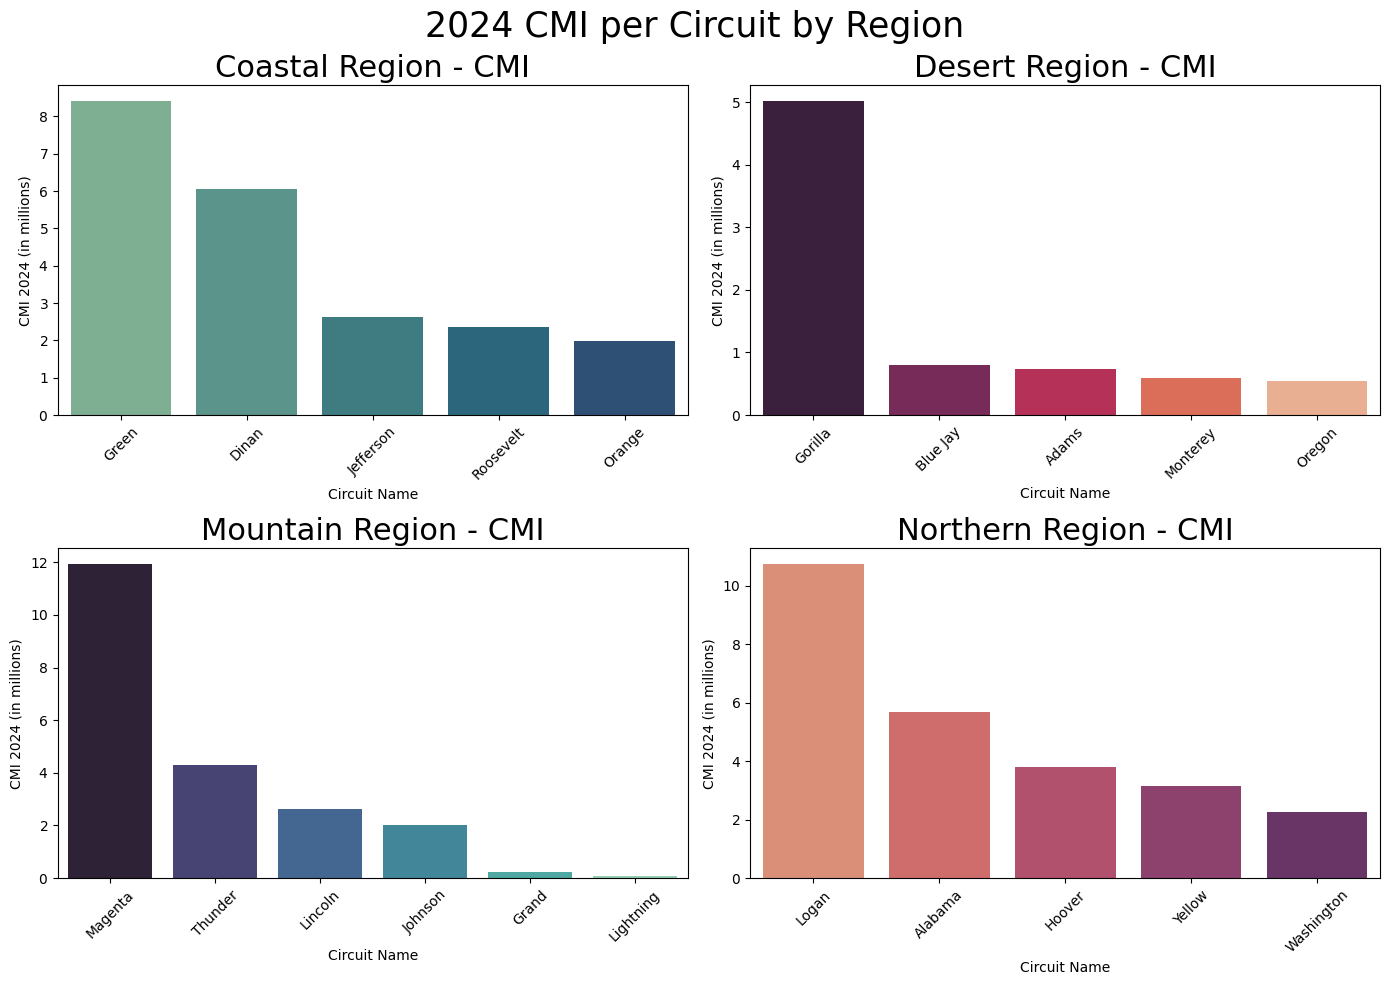

In [97]:
df_sorted = df.sort_values(by='circuit_name')

# Filter by region
coastal = df_sorted[df_sorted['region'] == 'Coastal']
desert = df_sorted[df_sorted['region'] == 'Desert']
mountain = df_sorted[df_sorted['region'] == 'Mountain']
north = df_sorted[df_sorted['region'] == 'North']

# Group by circuit and sum CMI, sorted descending
coastal_cmi = coastal.groupby('circuit_name')['cmi'].sum().reset_index().sort_values(by='cmi', ascending=False)
desert_cmi = desert.groupby('circuit_name')['cmi'].sum().reset_index().sort_values(by='cmi', ascending=False)
mountain_cmi = mountain.groupby('circuit_name')['cmi'].sum().reset_index().sort_values(by='cmi', ascending=False)
north_cmi = north.groupby('circuit_name')['cmi'].sum().reset_index().sort_values(by='cmi', ascending=False)

# Scale to millions
for region_df in [coastal_cmi, desert_cmi, mountain_cmi, north_cmi]:
    region_df['cmi'] = region_df['cmi'] / 1_000_000

# Plot setup
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Coastal - Crest
sns.barplot(data=coastal_cmi, x='circuit_name', y='cmi', palette='crest', ax=axs[0][0])
axs[0][0].set_title('Coastal Region - CMI', fontsize=22)
axs[0][0].tick_params(rotation=45, axis='x')
axs[0][0].set_xlabel("Circuit Name")

# Desert - Rocket
sns.barplot(data=desert_cmi, x='circuit_name', y='cmi', palette='rocket', ax=axs[0][1])
axs[0][1].set_title('Desert Region - CMI', fontsize=22)
axs[0][1].tick_params(rotation=45, axis='x')
axs[0][1].set_xlabel("Circuit Name")

# Mountain - Mako
sns.barplot(data=mountain_cmi, x='circuit_name', y='cmi', palette='mako', ax=axs[1][0])
axs[1][0].set_title('Mountain Region - CMI', fontsize=22)
axs[1][0].tick_params(rotation=45, axis='x')
axs[1][0].set_xlabel("Circuit Name")

# Northern - Flare
sns.barplot(data=north_cmi, x='circuit_name', y='cmi', palette='flare', ax=axs[1][1])
axs[1][1].set_title('Northern Region - CMI', fontsize=22)
axs[1][1].tick_params(rotation=45, axis='x')
axs[1][1].set_xlabel("Circuit Name")

# Final formatting
plt.suptitle('2024 CMI per Circuit by Region', fontsize=25)
y_label = "CMI 2024 (in millions)"
for ax in axs.flat:
    ax.set_ylabel(y_label)
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='plain', axis='y')  # disable scientific notation

plt.tight_layout()
plt.show()

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/1184455469.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coastal, x='circuit_name', y='outage_count', palette='crest', ax=axs[0][0])
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/1184455469.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=desert, x='circuit_name', y='outage_count', palette='rocket', ax=axs[0][1])
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/1184455469.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(d

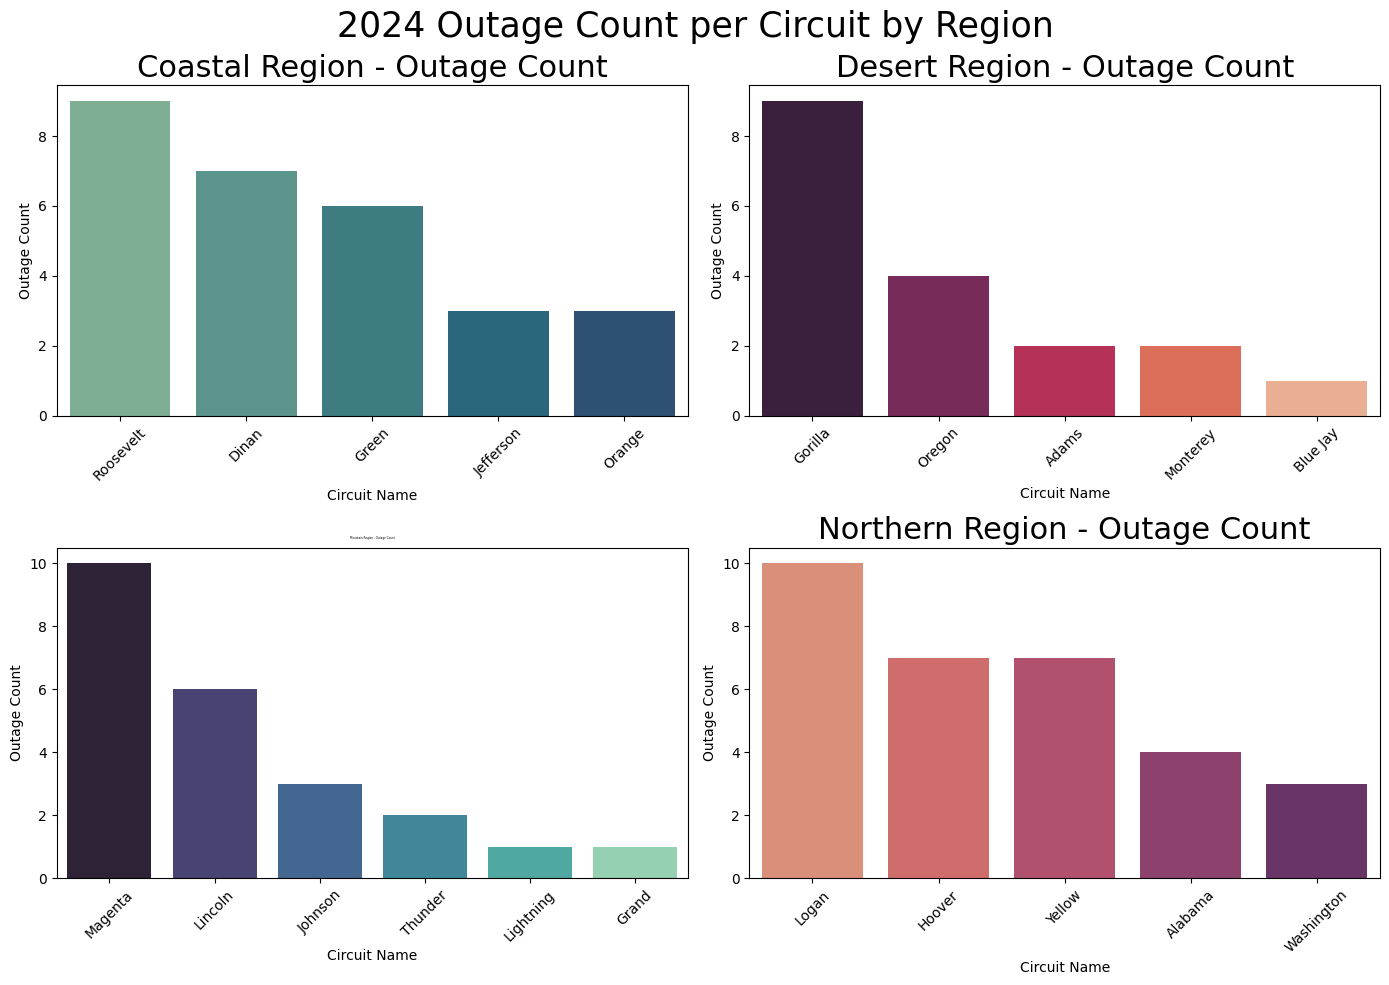

In [98]:
outage_counts = df['circuit_name'].value_counts().reset_index()
outage_counts.columns = ['circuit_name', 'outage_count']

# Merge with region info from the df
df_sorted = df.sort_values(by='circuit_name')
circuit_regions = df[['circuit_name', 'region']].drop_duplicates()
outage_counts = outage_counts.merge(circuit_regions, on='circuit_name', how='left')

# Filter by region
coastal = outage_counts[outage_counts['region'] == 'Coastal']
desert = outage_counts[outage_counts['region'] == 'Desert']
mountain = outage_counts[outage_counts['region'] == 'Mountain']
north = outage_counts[outage_counts['region'] == 'North']

# Plot setup
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Coastal - Crest palette
sns.barplot(data=coastal, x='circuit_name', y='outage_count', palette='crest', ax=axs[0][0])
axs[0][0].set_title('Coastal Region - Outage Count', fontsize=22)
axs[0][0].tick_params(rotation=45, axis='x')
axs[0][0].set_xlabel("Circuit Name")
axs[0][0].set_ylabel("Outage Count")

# Desert - Rocket palette
sns.barplot(data=desert, x='circuit_name', y='outage_count', palette='rocket', ax=axs[0][1])
axs[0][1].set_title('Desert Region - Outage Count', fontsize=22)
axs[0][1].tick_params(rotation=45, axis='x')
axs[0][1].set_xlabel("Circuit Name")
axs[0][1].set_ylabel("Outage Count")

# Mountain - Mako palette
sns.barplot(data=mountain, x='circuit_name', y='outage_count', palette='mako', ax=axs[1][0])
axs[1][0].set_title('Mountain Region - Outage Count', fontsize=2)
axs[1][0].tick_params(rotation=45, axis='x')
axs[1][0].set_xlabel("Circuit Name")
axs[1][0].set_ylabel("Outage Count")

# Northern - Magma palette
sns.barplot(data=north, x='circuit_name', y='outage_count', palette='flare', ax=axs[1][1])
axs[1][1].set_title('Northern Region - Outage Count', fontsize=22)
axs[1][1].tick_params(rotation=45, axis='x')
axs[1][1].set_xlabel("Circuit Name")
axs[1][1].set_ylabel("Outage Count")

# Final layout
plt.suptitle('2024 Outage Count per Circuit by Region', fontsize=25)
plt.tight_layout()
plt.show()

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/1123149330.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coastal, x='circuit_name', y='outage_count', palette='Blues', ax=axs[0][0])
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/1123149330.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=desert, x='circuit_name', y='outage_count', palette='Oranges', ax=axs[0][1])
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/1123149330.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(

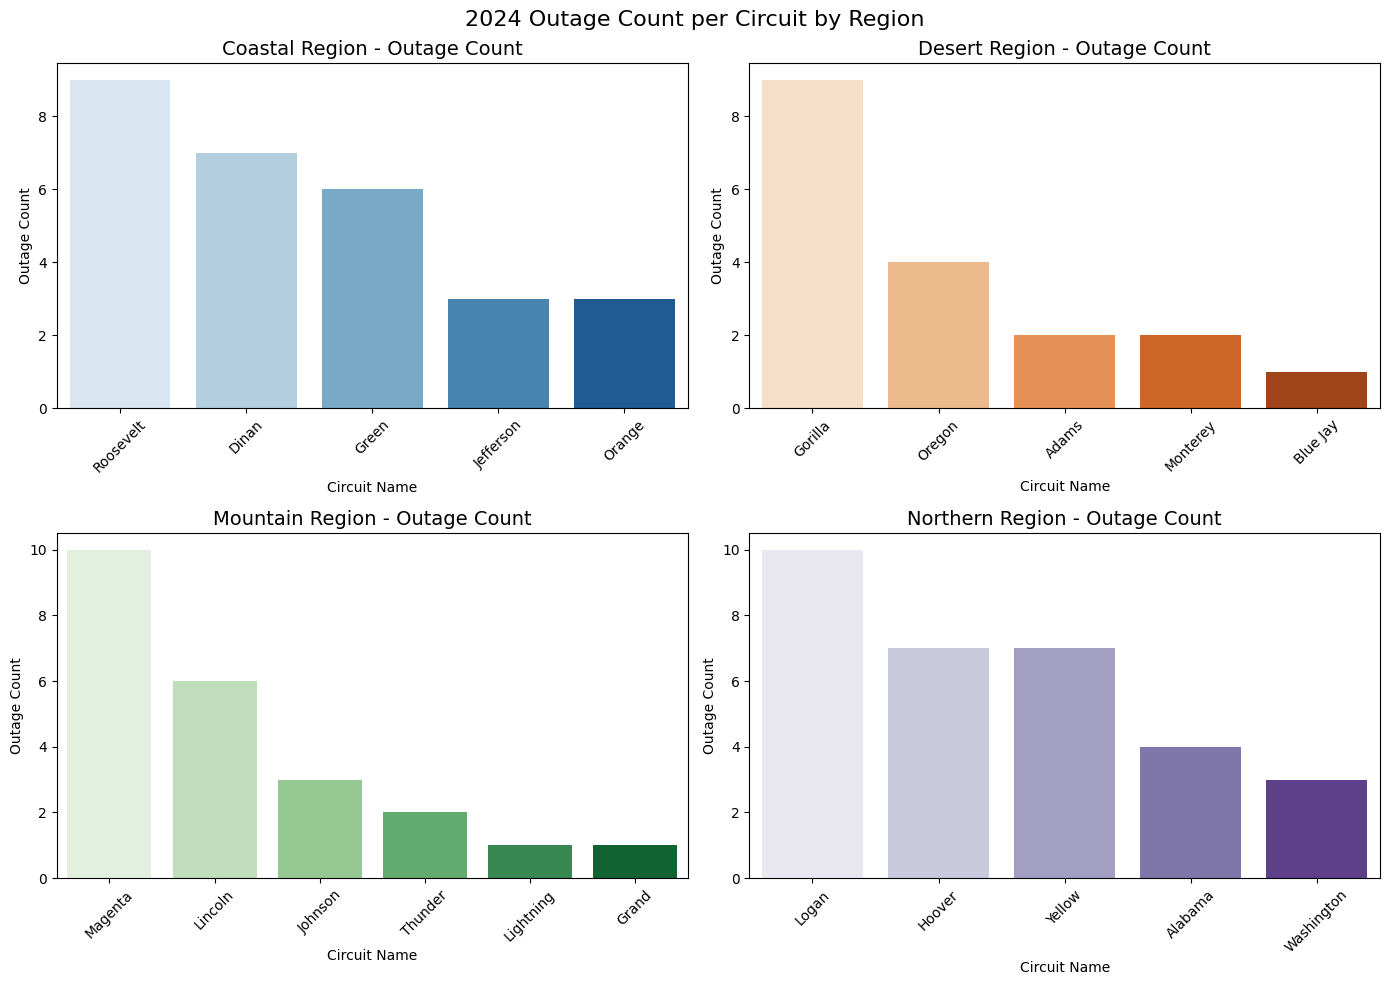

In [47]:


# Count outages per circuit
outage_counts = df['circuit_name'].value_counts().reset_index()
outage_counts.columns = ['circuit_name', 'outage_count']

# Merge with region info
df_sorted = df.sort_values(by='circuit_name')
circuit_regions = df[['circuit_name', 'region']].drop_duplicates()
outage_counts = outage_counts.merge(circuit_regions, on='circuit_name', how='left')

# Filter by region
coastal = outage_counts[outage_counts['region'] == 'Coastal']
desert = outage_counts[outage_counts['region'] == 'Desert']
mountain = outage_counts[outage_counts['region'] == 'Mountain']
north = outage_counts[outage_counts['region'] == 'North']

# Plot setup
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(data=coastal, x='circuit_name', y='outage_count', palette='Blues', ax=axs[0][0])
axs[0][0].set_title('Coastal Region - Outage Count', fontsize=14)
axs[0][0].tick_params(rotation=45, axis='x')
axs[0][0].set_xlabel("Circuit Name")
axs[0][0].set_ylabel("Outage Count")

sns.barplot(data=desert, x='circuit_name', y='outage_count', palette='Oranges', ax=axs[0][1])
axs[0][1].set_title('Desert Region - Outage Count', fontsize=14)
axs[0][1].tick_params(rotation=45, axis='x')
axs[0][1].set_xlabel("Circuit Name")
axs[0][1].set_ylabel("Outage Count")

sns.barplot(data=mountain, x='circuit_name', y='outage_count', palette='Greens', ax=axs[1][0])
axs[1][0].set_title('Mountain Region - Outage Count', fontsize=14)
axs[1][0].tick_params(rotation=45, axis='x')
axs[1][0].set_xlabel("Circuit Name")
axs[1][0].set_ylabel("Outage Count")

sns.barplot(data=north, x='circuit_name', y='outage_count', palette='Purples', ax=axs[1][1])
axs[1][1].set_title('Northern Region - Outage Count', fontsize=14)
axs[1][1].tick_params(rotation=45, axis='x')
axs[1][1].set_xlabel("Circuit Name")
axs[1][1].set_ylabel("Outage Count")

# Final layout
plt.suptitle('2024 Outage Count per Circuit by Region', fontsize=16)
plt.tight_layout()
plt.show()


/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/4044577405.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_outage_counts = df.groupby('outage_month').size().reset_index(name='outage_count')


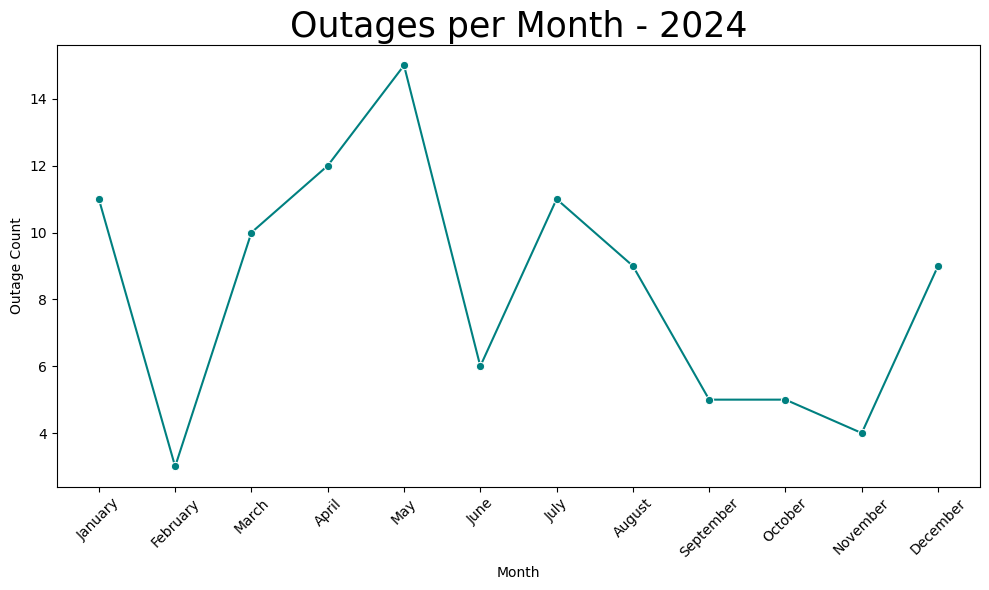

In [96]:
df['outage_month'] = pd.to_datetime(df['outage_date']).dt.month_name()

# Create categorical month order for proper sorting
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['outage_month'] = pd.Categorical(df['outage_month'], categories=month_order, ordered=True)

# Group by month and count outages
monthly_outage_counts = df.groupby('outage_month').size().reset_index(name='outage_count')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=monthly_outage_counts,
    x='outage_month',
    y='outage_count',
    marker='o',
    color='teal'  # <-- pick a non-default color here
)
plt.title('Outages per Month - 2024', fontsize=25)
plt.xlabel('Month')
plt.ylabel('Outage Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Extract month name from outage_date
df['outage_month'] = pd.to_datetime(df['outage_date']).dt.month_name()

# Set month order for proper x-axis sorting
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['outage_month'] = pd.Categorical(df['outage_month'], categories=month_order, ordered=True)

# Group by region and month, then count outages
monthly_outage_counts = (
    df.groupby(['region', 'outage_month'])
    .size()
    .reset_index(name='outage_count')
)

# Plot
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=monthly_outage_counts,
    x='outage_month',
    y='outage_count',
    hue='region',
    marker='o',
    palette={
        'Coastal': '#1f77b4',   # dark blue
        'Desert': '#b8860b',    # dirty gold
        'Mountain': '#2ca02c',  # forest green
        'North': '#8A2BE2'      # violet
    }
)

plt.title('2024 Outage Count per Month by Region', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Outage Count')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/63383397.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_cmi = df.groupby('outage_month')['cmi'].sum().reset_index()


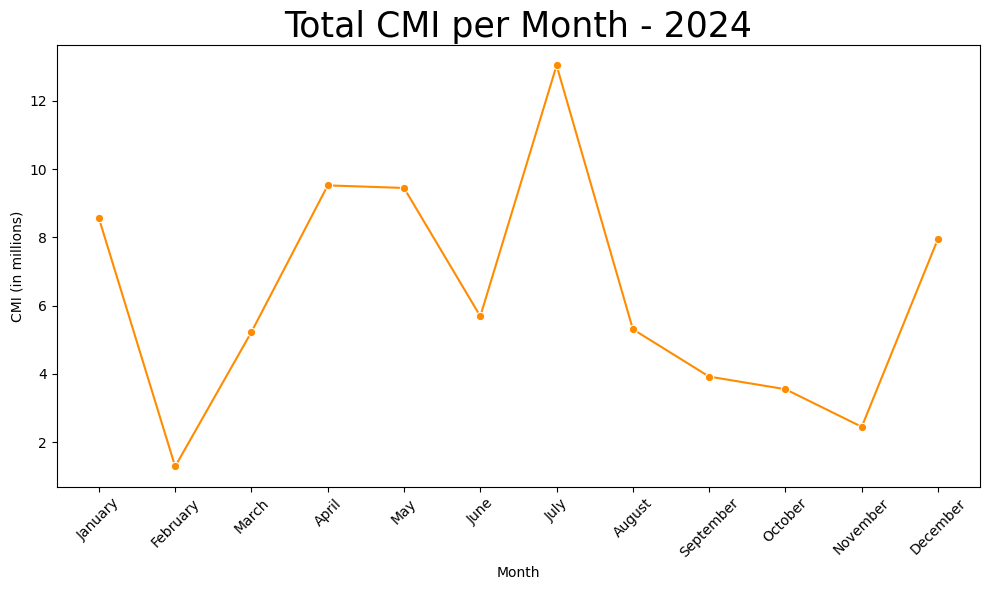

In [95]:
df['outage_month'] = pd.to_datetime(df['outage_date']).dt.month_name()

# Set month order for proper x-axis order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['outage_month'] = pd.Categorical(df['outage_month'], categories=month_order, ordered=True)

# Group by month and sum CMI
monthly_cmi = df.groupby('outage_month')['cmi'].sum().reset_index()
monthly_cmi['cmi'] = monthly_cmi['cmi'] / 1_000_000  # Scale to millions

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_cmi, x='outage_month', y='cmi', marker='o', color='darkorange')
plt.title('Total CMI per Month - 2024', fontsize=25)
plt.xlabel('Month')
plt.ylabel('CMI (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/1477696960.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_df.groupby('outage_month')['cmi']
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/1477696960.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_df.groupby('outage_month')['cmi']
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/1477696960.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the f

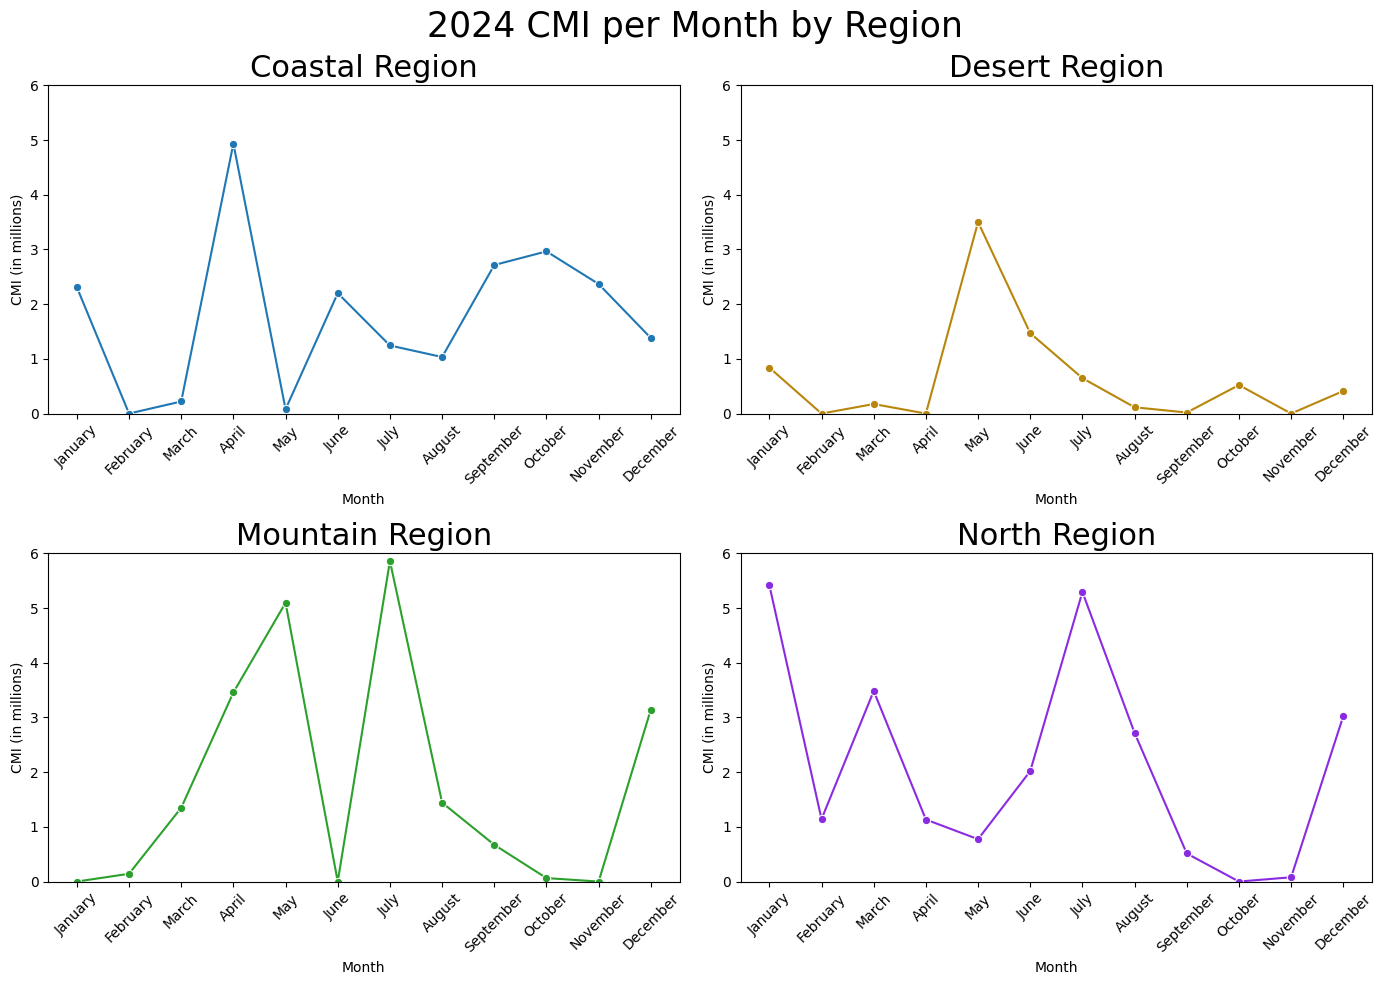

In [94]:
# Extract month name from outage_date
df['outage_month'] = pd.to_datetime(df['outage_date']).dt.month_name()

# Enforce proper month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['outage_month'] = pd.Categorical(df['outage_month'], categories=month_order, ordered=True)

# Define darker colors for each region
region_colors = {
    'Coastal': '#1f77b4',   # darker blue
    'Desert': '#b8860b',    # darker orange
    'Mountain': '#2ca02c',  # forest green
    'North': '#8A2BE2'      # violet (already dark)
}

# Fixed y-axis limit (in millions)
y_max = 6

# Set up subplots
regions = ['Coastal', 'Desert', 'Mountain', 'North']
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
region_axes = {
    'Coastal': axs[0][0],
    'Desert': axs[0][1],
    'Mountain': axs[1][0],
    'North': axs[1][1]
}

# Plot each region
for region in regions:
    region_df = df[df['region'] == region]

    monthly_cmi = (
        region_df.groupby('outage_month')['cmi']
        .sum()
        .reindex(month_order)
        .fillna(0)
        .reset_index()
    )
    monthly_cmi['cmi'] = monthly_cmi['cmi'] / 1_000_000  # Scale to millions

    ax = region_axes[region]
    sns.lineplot(
        data=monthly_cmi,
        x='outage_month',
        y='cmi',
        marker='o',
        color=region_colors[region],
        ax=ax
    )
    ax.set_title(f'{region} Region', fontsize=22)
    ax.set_xlabel("Month")
    ax.set_ylabel("CMI (in millions)")
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(0, y_max)

# Final layout
plt.suptitle('2024 CMI per Month by Region', fontsize=25)
plt.tight_layout()
plt.show()

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/51124740.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_df.groupby('outage_month')
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/51124740.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_df.groupby('outage_month')
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/51124740.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and si

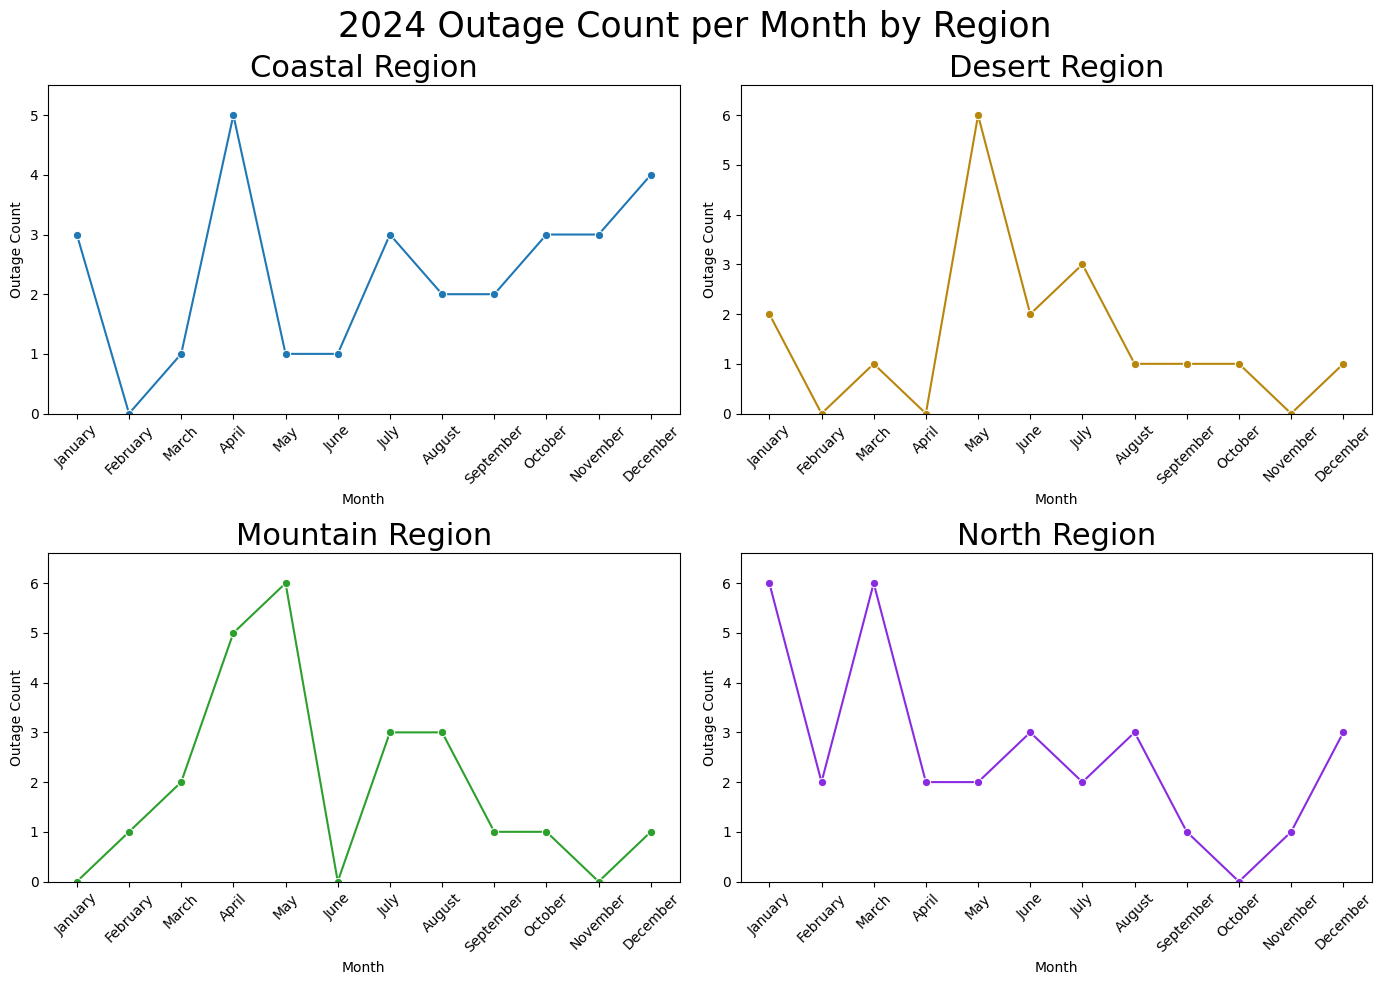

In [93]:
# Extract month name from outage_date
df['outage_month'] = pd.to_datetime(df['outage_date']).dt.month_name()

# Set categorical month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['outage_month'] = pd.Categorical(df['outage_month'], categories=month_order, ordered=True)

# Define colors
region_colors = {
    'Coastal': '#1f77b4',   # dark blue
    'Desert': '#b8860b',    # dirty gold
    'Mountain': '#2ca02c',  # forest green
    'North': '#8A2BE2'      # violet
}

# Setup subplots
regions = ['Coastal', 'Desert', 'Mountain', 'North']
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
region_axes = {
    'Coastal': axs[0][0],
    'Desert': axs[0][1],
    'Mountain': axs[1][0],
    'North': axs[1][1]
}

# Plot each region
for region in regions:
    region_df = df[df['region'] == region]
    
    monthly_counts = (
        region_df.groupby('outage_month')
        .size()
        .reindex(month_order, fill_value=0)
        .reset_index(name='outage_count')
    )

    ax = region_axes[region]
    sns.lineplot(
        data=monthly_counts,
        x='outage_month',
        y='outage_count',
        marker='o',
        color=region_colors[region],
        ax=ax
    )
    ax.set_title(f'{region} Region', fontsize=22)
    ax.set_xlabel("Month")
    ax.set_ylabel("Outage Count")
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(0, monthly_counts['outage_count'].max() * 1.1)  # padded y-limit

# Final layout
plt.suptitle('2024 Outage Count per Month by Region', fontsize=25)
plt.tight_layout()
plt.show()

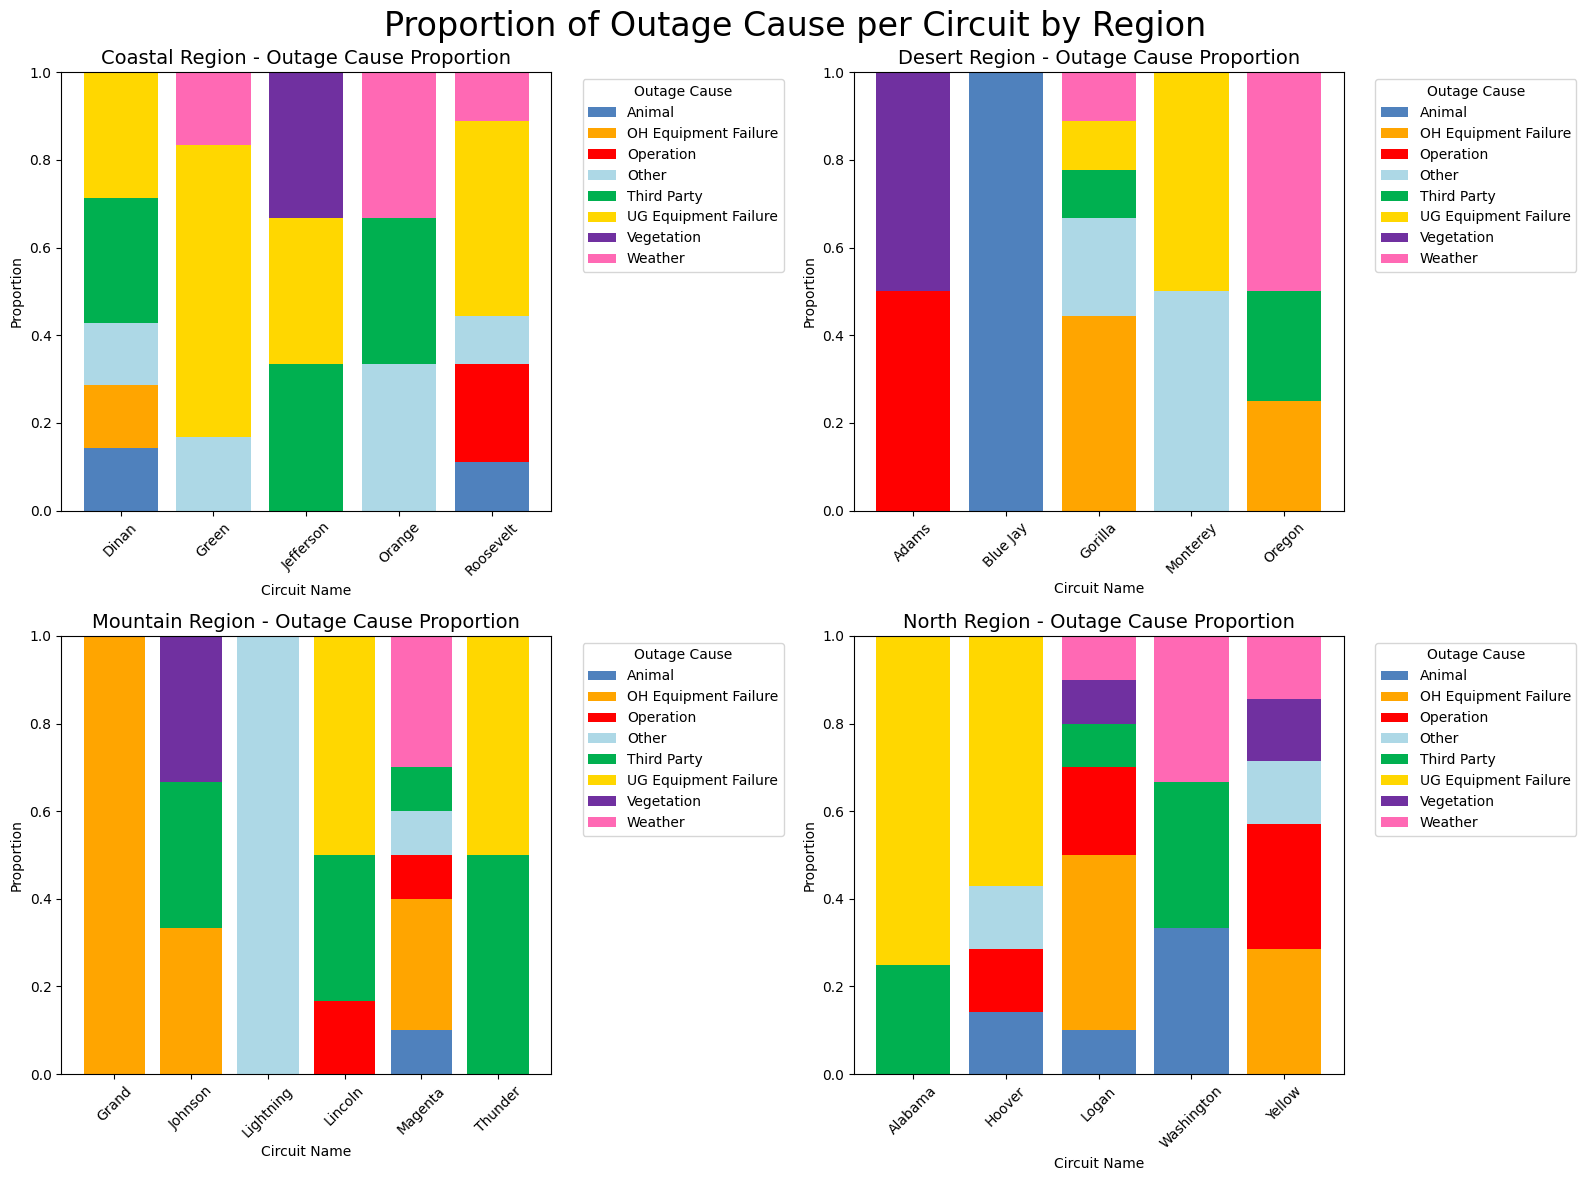

In [90]:
df_sorted = df.sort_values(by='circuit_name')

# Correct outage causes in the right order (matching your Tableau legend)
all_causes = [
    'Animal',
    'OH Equipment Failure',
    'Operation',
    'Other',
    'Third Party',
    'UG Equipment Failure',
    'Vegetation',
    'Weather'
]


cause_colors = {
    'Animal': '#4F81BD',             # Blue
    'OH Equipment Failure': '#FFA500', # Bright Orange
    'Operation': '#FF0000',           # Light Red
    'Other': '#ADD8E6',               # Light Blue
    'Third Party': '#00B050',         # Green
    'UG Equipment Failure': '#FFD700',# Bright Yellow (Goldish)
    'Vegetation': '#7030A0',          # Purple
    'Weather': '#FF69B4'              # Hot Pink / Bright Pink
}

# Define regions
regions = ['Coastal', 'Desert', 'Mountain', 'North']

# Plot setup
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

# Stacked bar plots
for i, region in enumerate(regions):
    region_df = df_sorted[df_sorted['region'] == region]

    # Outage cause proportions per circuit
    cause_prop = (
        region_df.groupby(['circuit_name', 'outage_cause'])
        .size()
        .unstack(fill_value=0)
        .reindex(columns=all_causes)
    )
    cause_prop = cause_prop.div(cause_prop.sum(axis=1), axis=0)  # proportions

    # Draw each layer of the stack
    bottom = pd.Series([0] * len(cause_prop), index=cause_prop.index)
    for cause in all_causes:
        axs[i].bar(
            cause_prop.index,
            cause_prop[cause],
            bottom=bottom,
            color=cause_colors[cause],
            label=cause,
            width=0.8
        )
        bottom += cause_prop[cause]

    axs[i].set_title(f'{region} Region - Outage Cause Proportion', fontsize=14)
    axs[i].tick_params(rotation=45, axis='x')
    axs[i].set_xlabel('Circuit Name')
    axs[i].set_ylabel('Proportion')
    axs[i].legend(title='Outage Cause', bbox_to_anchor=(1.05, 1), loc='upper left')

# Overall title and layout
plt.suptitle('Proportion of Outage Cause per Circuit by Region', fontsize=24)
plt.tight_layout()
plt.show()

In [73]:
circuit.head()


,circuit_number,circuit_name,voltage,region,customer_count,circuit_miles,percent_overhead,percent_underground,saidi_2023,saidi_2024,saidi_diff_from_prev_year,saifi_2023,saifi_2024,saifi_diff_from_prev_year,total_outage_time_2024,total_outages_2024
0,1,Orange,4,Coastal,1299,45,90,10,1.68,1.94,0.26,0.002,0.002,0.000,2521,3
1,2,Alabama,12,North,3447,29,82,18,0.57,0.60,0.03,0.001,0.001,0.000,2073,4
2,3,Green,12,Coastal,2701,26,55,45,2.40,2.04,-0.36,0.002,0.002,0.000,5514,6
3,4,Oregon,16,Desert,1147,101,85,15,1.39,1.64,0.25,0.002,0.003,0.001,1883,4
4,5,Yellow,4,North,1706,43,85,15,2.20,2.87,0.67,0.005,0.004,-0.001,4901,7


In [74]:
circuit.head(21)

,circuit_number,circuit_name,voltage,region,customer_count,circuit_miles,percent_overhead,percent_underground,saidi_2023,saidi_2024,saidi_diff_from_prev_year,saifi_2023,saifi_2024,saifi_diff_from_prev_year,total_outage_time_2024,total_outages_2024
0,1,Orange,4,Coastal,1299,45,90,10,1.68,1.94,0.26,0.002,0.002,0.000,2521,3
1,2,Alabama,12,North,3447,29,82,18,0.57,0.60,0.03,0.001,0.001,0.000,2073,4
2,3,Green,12,Coastal,2701,26,55,45,2.40,2.04,-0.36,0.002,0.002,0.000,5514,6
3,4,Oregon,16,Desert,1147,101,85,15,1.39,1.64,0.25,0.002,0.003,0.001,1883,4
4,5,Yellow,4,North,1706,43,85,15,2.20,2.87,0.67,0.005,0.004,-0.001,4901,7
5,6,Washington,12,North,1312,38,18,82,1.79,2.24,0.45,0.002,0.002,0.000,2937,3
6,7,Lincoln,16,Mountain,1634,95,65,35,2.40,2.55,0.15,0.004,0.004,0.000,4172,6
7,8,Johnson,16,Mountain,1641,64,60,40,0.91,1.21,0.30,0.001,0.002,0.001,1981,3
8,9,Magenta,16,Mountain,2367,129,75,25,3.77,3.21,-0.56,0.006,0.004,-0.002,7597,10
9,10,Adams,4,Desert,1647,32,77,23,1.08,0.93,-0.15,0.001,0.001,0.000,1537,2


In [75]:
circuit['saidi_percent_change'] = ((circuit['saidi_2024'] - circuit['saidi_2023']) / circuit['saidi_2023']) * 100


In [76]:
circuit.head(21)

,circuit_number,circuit_name,voltage,region,customer_count,circuit_miles,percent_overhead,percent_underground,saidi_2023,saidi_2024,saidi_diff_from_prev_year,saifi_2023,saifi_2024,saifi_diff_from_prev_year,total_outage_time_2024,total_outages_2024,saidi_percent_change
0,1,Orange,4,Coastal,1299,45,90,10,1.68,1.94,0.26,0.002,0.002,0.000,2521,3,15.476190
1,2,Alabama,12,North,3447,29,82,18,0.57,0.60,0.03,0.001,0.001,0.000,2073,4,5.263158
2,3,Green,12,Coastal,2701,26,55,45,2.40,2.04,-0.36,0.002,0.002,0.000,5514,6,-15.000000
3,4,Oregon,16,Desert,1147,101,85,15,1.39,1.64,0.25,0.002,0.003,0.001,1883,4,17.985612
4,5,Yellow,4,North,1706,43,85,15,2.20,2.87,0.67,0.005,0.004,-0.001,4901,7,30.454545
5,6,Washington,12,North,1312,38,18,82,1.79,2.24,0.45,0.002,0.002,0.000,2937,3,25.139665
6,7,Lincoln,16,Mountain,1634,95,65,35,2.40,2.55,0.15,0.004,0.004,0.000,4172,6,6.250000
7,8,Johnson,16,Mountain,1641,64,60,40,0.91,1.21,0.30,0.001,0.002,0.001,1981,3,32.967033
8,9,Magenta,16,Mountain,2367,129,75,25,3.77,3.21,-0.56,0.006,0.004,-0.002,7597,10,-14.854111
9,10,Adams,4,Desert,1647,32,77,23,1.08,0.93,-0.15,0.001,0.001,0.000,1537,2,-13.888889


AttributeError: module 'pandas' has no attribute 'sort_values'

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/2015042188.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coastal_dur, x='circuit_name', y='outage_duration', palette='crest', ax=axs[0][0])
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/2015042188.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=desert_dur, x='circuit_name', y='outage_duration', palette='rocket', ax=axs[0][1])
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_6025/2015042188.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

 

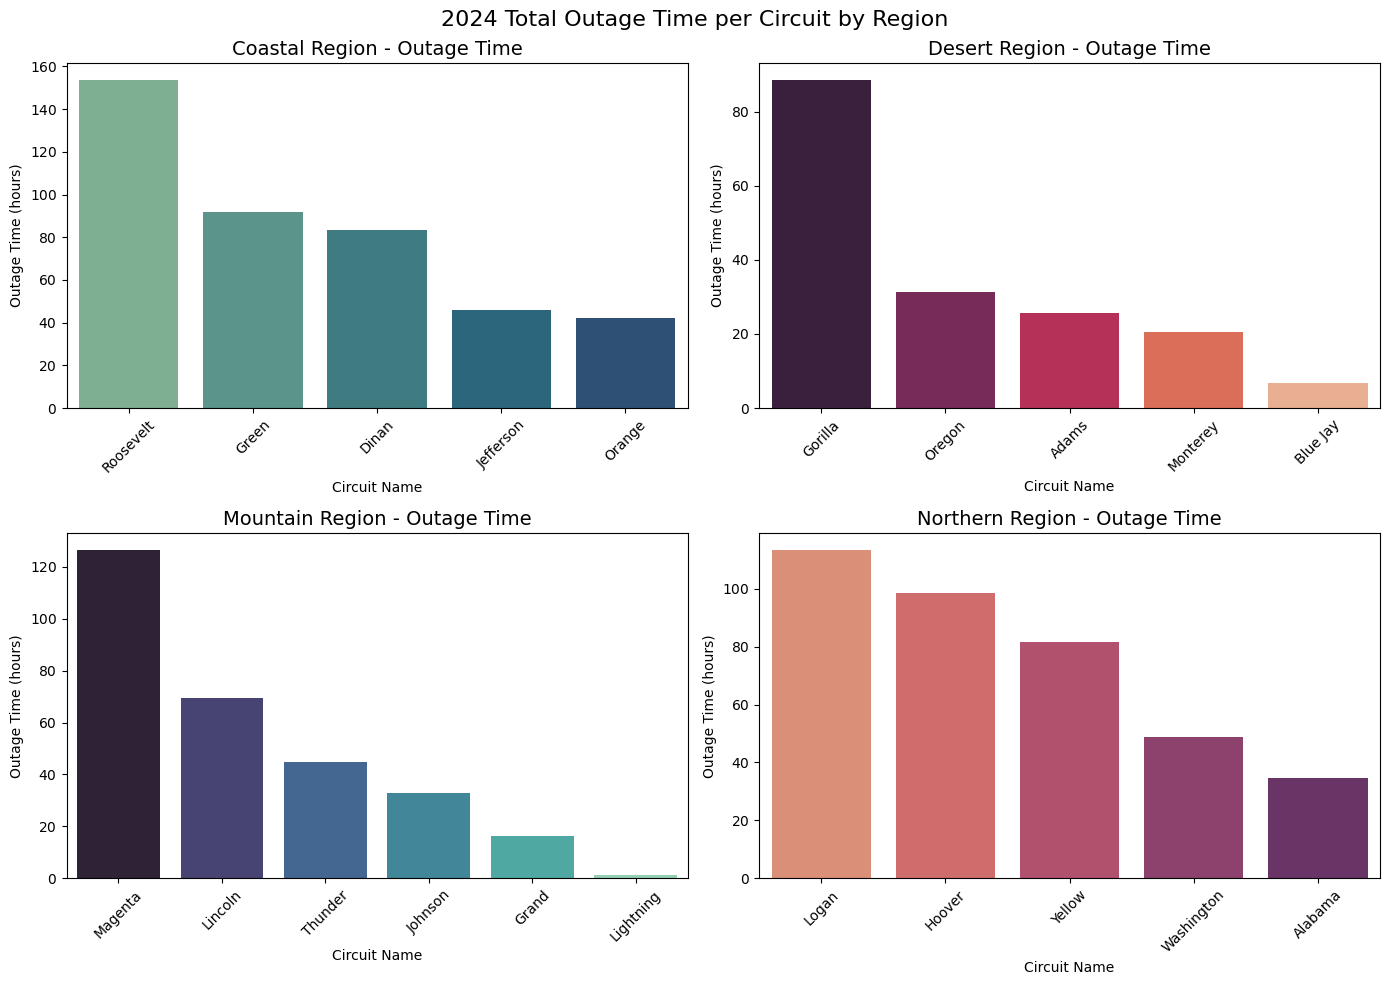

In [80]:
df_sorted = df.sort_values(by='circuit_name')

# Filter by region
coastal = df_sorted[df_sorted['region'] == 'Coastal']
desert = df_sorted[df_sorted['region'] == 'Desert']
mountain = df_sorted[df_sorted['region'] == 'Mountain']
north = df_sorted[df_sorted['region'] == 'North']

# Group by circuit and sum outage duration
coastal_dur = coastal.groupby('circuit_name')['outage_duration'].sum().reset_index().sort_values(by='outage_duration', ascending=False)
desert_dur = desert.groupby('circuit_name')['outage_duration'].sum().reset_index().sort_values(by='outage_duration', ascending=False)
mountain_dur = mountain.groupby('circuit_name')['outage_duration'].sum().reset_index().sort_values(by='outage_duration', ascending=False)
north_dur = north.groupby('circuit_name')['outage_duration'].sum().reset_index().sort_values(by='outage_duration', ascending=False)

# Scale durations to hours or thousands of minutes (optional)
for region_df in [coastal_dur, desert_dur, mountain_dur, north_dur]:
    region_df['outage_duration'] = region_df['outage_duration'] / 60  # convert minutes to hours

# Plot setup
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Coastal - Crest
sns.barplot(data=coastal_dur, x='circuit_name', y='outage_duration', palette='crest', ax=axs[0][0])
axs[0][0].set_title('Coastal Region - Outage Time', fontsize=14)
axs[0][0].tick_params(rotation=45, axis='x')
axs[0][0].set_xlabel("Circuit Name")

# Desert - Rocket
sns.barplot(data=desert_dur, x='circuit_name', y='outage_duration', palette='rocket', ax=axs[0][1])
axs[0][1].set_title('Desert Region - Outage Time', fontsize=14)
axs[0][1].tick_params(rotation=45, axis='x')
axs[0][1].set_xlabel("Circuit Name")

# Mountain - Mako
sns.barplot(data=mountain_dur, x='circuit_name', y='outage_duration', palette='mako', ax=axs[1][0])
axs[1][0].set_title('Mountain Region - Outage Time', fontsize=14)
axs[1][0].tick_params(rotation=45, axis='x')
axs[1][0].set_xlabel("Circuit Name")

# Northern - Flare
sns.barplot(data=north_dur, x='circuit_name', y='outage_duration', palette='flare', ax=axs[1][1])
axs[1][1].set_title('Northern Region - Outage Time', fontsize=14)
axs[1][1].tick_params(rotation=45, axis='x')
axs[1][1].set_xlabel("Circuit Name")

# Final formatting
plt.suptitle('2024 Total Outage Time per Circuit by Region', fontsize=16)
y_label = "Outage Time (hours)"  # change to minutes if needed
for ax in axs.flat:
    ax.set_ylabel(y_label)
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

In [81]:
circuit[ circuit['circuit_name'] == 'Roosevelt']

,circuit_number,circuit_name,voltage,region,customer_count,circuit_miles,percent_overhead,percent_underground,saidi_2023,saidi_2024,saidi_diff_from_prev_year,saifi_2023,saifi_2024,saifi_diff_from_prev_year,total_outage_time_2024,total_outages_2024,saidi_percent_change
10,11,Roosevelt,12,Coastal,441,32,72,28,13.65,20.92,7.27,0.012,0.02,0.008,9225,9,53.260073


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   circuit_number             100 non-null    int64         
 1   circuit_name               100 non-null    object        
 2   outage_date                100 non-null    datetime64[ns]
 3   season                     100 non-null    object        
 4   outage_cause_code          100 non-null    int64         
 5   outage_cause               100 non-null    object        
 6   outage_duration            100 non-null    int64         
 7   customers_affected         100 non-null    int64         
 8   cmi                        100 non-null    int64         
 9   voltage                    100 non-null    int64         
 10  region                     100 non-null    object        
 11  customer_count             100 non-null    int64         
 12  circuit_m

In [83]:
circuit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   circuit_number             21 non-null     int64  
 1   circuit_name               21 non-null     object 
 2   voltage                    21 non-null     int64  
 3   region                     21 non-null     object 
 4   customer_count             21 non-null     int64  
 5   circuit_miles              21 non-null     int64  
 6   percent_overhead           21 non-null     int64  
 7   percent_underground        21 non-null     int64  
 8   saidi_2023                 21 non-null     float64
 9   saidi_2024                 21 non-null     float64
 10  saidi_diff_from_prev_year  21 non-null     float64
 11  saifi_2023                 21 non-null     float64
 12  saifi_2024                 21 non-null     float64
 13  saifi_diff_from_prev_year  21 non-null     float64
 

In [84]:
df.to_excel('Data/enriched_outage_data.xlsx')

In [85]:
circuit.to_excel('Data/enriched_circuit_data.xlsx')

In [110]:
# Step 1: Count outage causes per circuit
cause_counts = (
    df.groupby(['region', 'circuit_name', 'outage_cause'])
    .size()
    .reset_index(name='count')
)

# Step 2: Count total outages per circuit
total_counts = (
    df.groupby(['region', 'circuit_name'])['outage_cause']
    .count()
    .reset_index(name='outage_count')
)

# Step 3: Merge and calculate proportion
merged = pd.merge(cause_counts, total_counts, on=['region', 'circuit_name'])
merged['cause_proportion'] = (merged['count'] / merged['outage_count']).round(2)

# Step 4: Keep only the top cause per circuit
top_cause_df = (
    merged.sort_values(['region', 'circuit_name', 'count'], ascending=[True, True, False])
    .drop_duplicates(subset=['region', 'circuit_name'])
    .rename(columns={
        'outage_cause': 'top_outage_cause',
        'cause_proportion': 'cause_proportion'
    })[['region', 'circuit_name', 'outage_count', 'top_outage_cause', 'cause_proportion']]
)

# Step 5: Create region-specific DataFrames sorted by outage count
coastal_df = top_cause_df[top_cause_df['region'] == 'Coastal'].sort_values(by='outage_count', ascending=False)
desert_df = top_cause_df[top_cause_df['region'] == 'Desert'].sort_values(by='outage_count', ascending=False)
mountain_df = top_cause_df[top_cause_df['region'] == 'Mountain'].sort_values(by='outage_count', ascending=False)
north_df = top_cause_df[top_cause_df['region'] == 'North'].sort_values(by='outage_count', ascending=False)

# Step 6: Display each table
print("\t🌊 Coastal Region")
display(coastal_df)

print("\n\t🏜️ Desert Region")
display(desert_df)

print("\n\t⛰️ Mountain Region")
display(mountain_df)

print("\n\t🌲 North Region")
display(north_df)



	🌊 Coastal Region


,region,circuit_name,outage_count,top_outage_cause,cause_proportion
17,Coastal,Roosevelt,9,UG Equipment Failure,0.44
3,Coastal,Dinan,7,Third Party,0.29
6,Coastal,Green,6,UG Equipment Failure,0.67
8,Coastal,Jefferson,3,Third Party,0.33
11,Coastal,Orange,3,Other,0.33



	🏜️ Desert Region


,region,circuit_name,outage_count,top_outage_cause,cause_proportion
22,Desert,Gorilla,9,OH Equipment Failure,0.44
31,Desert,Oregon,4,Weather,0.50
19,Desert,Adams,2,Operation,0.50
27,Desert,Monterey,2,Other,0.50
21,Desert,Blue Jay,1,Animal,1.00



	⛰️ Mountain Region


,region,circuit_name,outage_count,top_outage_cause,cause_proportion
41,Mountain,Magenta,10,OH Equipment Failure,0.30
39,Mountain,Lincoln,6,UG Equipment Failure,0.50
33,Mountain,Johnson,3,OH Equipment Failure,0.33
46,Mountain,Thunder,2,Third Party,0.50
32,Mountain,Grand,1,OH Equipment Failure,1.00
36,Mountain,Lightning,1,Other,1.00



	🌲 North Region


,region,circuit_name,outage_count,top_outage_cause,cause_proportion
55,North,Logan,10,OH Equipment Failure,0.40
53,North,Hoover,7,UG Equipment Failure,0.57
63,North,Yellow,7,OH Equipment Failure,0.29
49,North,Alabama,4,UG Equipment Failure,0.75
60,North,Washington,3,Animal,0.33
